In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import scipy as sp
pd.set_option("display.max_columns", None)


In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
# DF1 = Total and facet scores, and score per question
df1 = pd.read_excel('RisikoAtlas_EuropeanSurvey_randomhalfone.xlsx')
df1

random  responseid  country  leg_conditions_riskp  q0  s1  s2_1  \
0          1        2624       10                     2   1   1    65   
1          0        2666       10                     1   1   1    61   
2          1        2891       10                     2   1   2    60   
3          1        2609       10                     2   1   1    64   
4          1        2663       10                     3   1   2    70   
...      ...         ...      ...                   ...  ..  ..   ...   
1948       0       13378       12                     1   1   2    28   
1949       0       13465       12                     1   1   2    34   
1950       0        1122       12                     2   1   2    35   
1951       1       12807       12                     2   1   2    26   
1952       0       10915       12                     2   1   1    34   

      age_rec  isced                       s7                     s8  q5_1  \
0           4      2               Vilasantar                capataz     4   
1           4      2                LA CORUÑA               JUBILADO     3   
2           4      2                 valencia       visitador medico     5   
3           4      2                barcelona               ayudante     4   
4           4      2  virgen del camino  Leon               Jubilado     5   
...       ...    ...                      ...                    ...   ...   
1948        2      2                  estrées             apiculteur     4   
1949        2      2                     metz                Employé     4   
1950        2      2        sennecey le grand    employé de commerce     4   
1951        2      2                   pulnoy              jardinier     4   
1952        2      2                   cugand  asssitante maternelle     3   

      q5_2  q5_5  q5_6  q5_9  q8_2_1  q8_2_2  q8_2_3  q8_2_4  q8_2_5  q8_3  \
0        2     3     4     4       1       1       1       2       2     4   
1        3     3     5     1       2       2       2       1       2     1   
2        3     2     5     5       1       1       1       1       2     2   
3        3     2     4     3       1       1       1       1       2     2   
4        3     3     4     3       1       1       1       1       2     2   
...    ...   ...   ...   ...     ...     ...     ...     ...     ...   ...   
1948     3     5     4     5       2       2       2       2       2     4   
1949     3     3     4     3       1       2       2       2       2     2   
1950     2     3     4     4       1       1       1       2       2     2   
1951     4     4     4     4       1       1       1       2       2     3   
1952     1     1     3     5       1       1       1       2       2     4   

      q8_4  q8_5berlin_1  q8_5london_1  q8_5paris_1  q8_6  q8_7  q9_1_1  \
0        1             1             1            2     2     4      25   
1        4             2             1            2     4     4      50   
2        4             2             1            1     1     1      25   
3        2             2             1            1     4     3      50   
4        3             2             2            1     1     1      55   
...    ...           ...           ...          ...   ...   ...     ...   
1948     4             2             1            1     1     1      25   
1949     2             1             1            1     3     2      18   
1950     4             2             1            1     1     3       9   
1951     3             2             1            1     1     3       8   
1952     1             1             2            1     4     4      50   

      q9_2_1  q9_3  q10_1_1  q10_2_1  q10_3_1  q10_4  q11_1  q12  q13_1  \
0         60     4       80        1    10.00      2      2    2      1   
1         66     4      500       10    10.00      2      0    2      1   
2         20     3      500       10     0.10      3      0    3      1   
3         20     3      500     1000     0.10      2  

In [4]:
df1["age"] = df1["s2_1"]
df1["income"] = df1["q12"]
df1["wealth"] = df1["q14_1"]

df1["Certainty_3"] = df1["certainty1"] + df1["certainty2"] + df1["certainty3"]
df1["RiskComprehension_4"] = df1["riskcomprehension1"] + df1["riskcomprehension2"] + df1["riskcomprehension3"] + df1["riskcomprehension4"]
df1["GraphLiteracy_3"] = df1["graphliteracy1"] + df1["graphliteracy2"] + df1["graphliteracy3"]
df1["Numeracy_3"] = df1["numeracy1"] + df1["numeracy2"] + df1["numeracy3"]
df1["Bayesianreasoning_1"] = df1["numeracy4"]
df1["TotalScore_14"] = df1["Certainty_3"] + df1["RiskComprehension_4"] + df1["GraphLiteracy_3"] + df1["Numeracy_3"] + df1["Bayesianreasoning_1"]

df1["Certainty_%"] = df1["Certainty_3"] / 3 * 100
df1["RiskComprehension_%"] = df1["RiskComprehension_4"] / 4 * 100
df1["GraphLiteracy_%"] = df1["GraphLiteracy_3"] / 3 * 100
df1["Numeracy_%"] = df1["Numeracy_3"] / 3 * 100
df1["Bayesianreasoning_%"] = df1["Bayesianreasoning_1"] / 1 * 100

df1["TotalScore_%"] = df1["TotalScore_14"] / 14 * 100


colReq = ["responseid", "age", "age_rec", "isced", "income", "wealth", "Certainty_3", "RiskComprehension_4", "GraphLiteracy_3",
          "Numeracy_3", "Bayesianreasoning_1", "Certainty_%", "RiskComprehension_%", "GraphLiteracy_%", "Numeracy_%", "Bayesianreasoning_%",
          "TotalScore_14", "TotalScore_%",]

df2 = df1[colReq].copy()
df2

responseid  age  age_rec  isced  income    wealth  Certainty_3  \
0           2624   65        4      2       2   30000.0            0   
1           2666   61        4      2       2   24000.0            3   
2           2891   60        4      2       3  200000.0            0   
3           2609   64        4      2       1       NaN            0   
4           2663   70        4      2       3    2500.0            0   
...          ...  ...      ...    ...     ...       ...          ...   
1948       13378   28        2      2       3    1000.0            3   
1949       13465   34        2      2       5   10000.0            2   
1950        1122   35        2      2       2       NaN            0   
1951       12807   26        2      2       4       NaN            0   
1952       10915   34        2      2       3       NaN            0   

      RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
0                       1                1           0                    0   
1                       2                0           2                    0   
2                       4                3           3                    0   
3                       3                2           2                    0   
4                       3                1           0                    1   
...                   ...              ...         ...                  ...   
1948                    4                2           2                    1   
1949                    2                1           3                    0   
1950                    4                0           3                    0   
1951                    4                2           1                    0   
1952                    1                2           2                    0   

      Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0        0.000000                 25.0        33.333333    0.000000   
1      100.000000                 50.0         0.000000   66.666667   
2        0.000000                100.0       100.000000  100.000000   
3        0.000000                 75.0        66.666667   66.666667   
4        0.000000                 75.0        33.333333    0.000000   
...           ...                  ...              ...         ...   
1948   100.000000                100.0        66.666667   66.666667   
1949    66.666667                 50.0        33.333333  100.000000   
1950     0.000000                100.0         0.000000  100.000000   
1951     0.000000                100.0        66.666667   33.333333   
1952     0.000000                 25.0        66.666667   66.666667   

      Bayesianreasoning_%  TotalScore_14  TotalScore_%  
0                     0.0              2     14.285714  
1                     0.0              7     50.000000  
2                     0.0             10     71.428571  
3                     0.0              7     50.000000  
4                   100.0              5     35.714286  
...                   ...            ...           ...  
1948                100.0             12     85.714286  
1949                  0.0              8     57.142857  
1950                  0.0              7     50.000000  
1951                  0.0              7     50.000000  
1952                  0.0              5     35.714286  

[1953 rows x 18 columns]

<Axes: title={'center': 'Frequency of Scores'}, xlabel='TotalScore_14', ylabel='Frequency'>

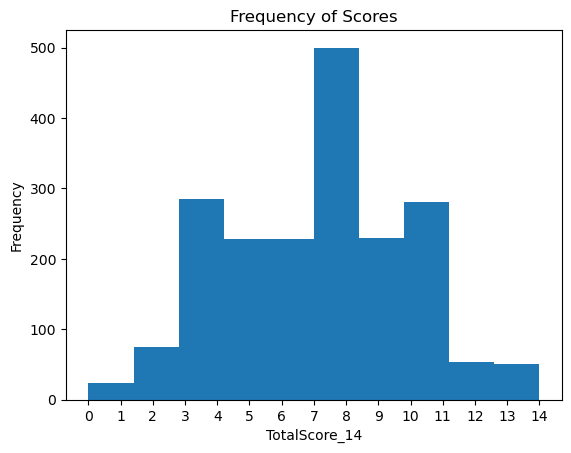

In [5]:
# The following graph represents frequency of each data point on "TotalScore_14" or the total score out of 19 questions across the sample.

df2['TotalScore_14'].plot(kind = 'hist', xticks = np.arange(0, 15, step=1), xlabel = 'TotalScore_14', title = 'Frequency of Scores' )

<Axes: title={'center': 'Absolute mean of scores for above data set'}>

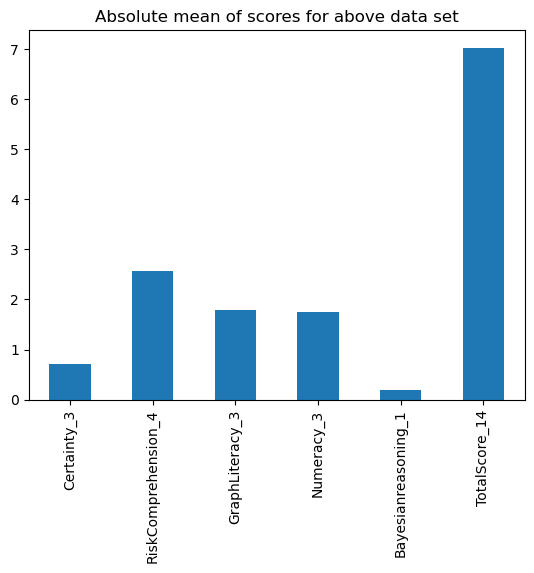

In [6]:
# Absolute mean scores for each facet

(df2[['Certainty_3','RiskComprehension_4','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1','TotalScore_14']].mean(axis = 0)).plot(kind = 'bar', title = 'Absolute mean of scores for above data set')

<Axes: title={'center': 'Normalised mean of scores for above data set'}>

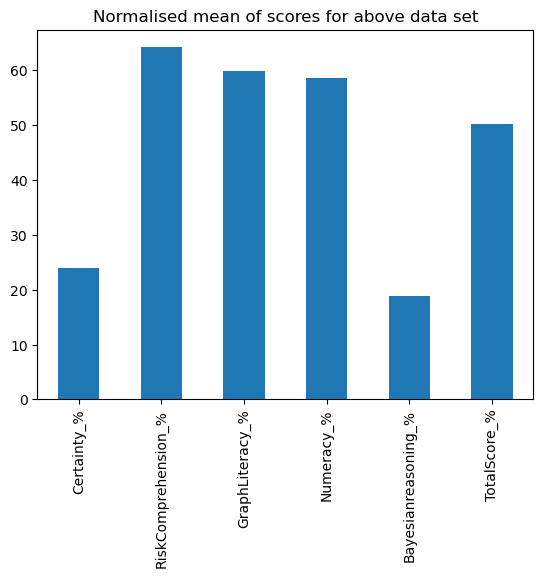

In [7]:
# Normalised mean scores for each facet

df2[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0).plot(kind = 'bar', title = 'Normalised mean of scores for above data set')

In [8]:
# DF3 = Sorted by income

df3 = df2.sort_values(by = 'income')
df3 = df3.reset_index(drop = True)
df3.drop(df3[df3['income'] == 7].index, inplace = True)

df3

responseid  age  age_rec  isced  income     wealth  Certainty_3  \
0           3121   25        2      1       1        NaN            0   
1            922   62        4      3       1     5000.0            1   
2           9780   32        2      2       1      600.0            0   
3           5235   26        2      1       1     1000.0            0   
4           6429   25        2      1       1     5300.0            1   
...          ...  ...      ...    ...     ...        ...          ...   
1695         330   53        3      1       6     5000.0            1   
1696        9132   55        3      1       6        NaN            0   
1697          27   46        3      1       6   500000.0            3   
1698        8715   33        2      2       6  3500000.0            0   
1699         583   39        3      1       6        NaN            0   

      RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
0                       3                2           3                    0   
1                       3                3           2                    1   
2                       2                1           1                    0   
3                       1                1           1                    0   
4                       1                1           1                    0   
...                   ...              ...         ...                  ...   
1695                    2                2           3                    0   
1696                    0                2           0                    0   
1697                    4                3           3                    0   
1698                    2                1           1                    0   
1699                    3                3           3                    1   

      Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0        0.000000                 75.0        66.666667  100.000000   
1       33.333333                 75.0       100.000000   66.666667   
2        0.000000                 50.0        33.333333   33.333333   
3        0.000000                 25.0        33.333333   33.333333   
4       33.333333                 25.0        33.333333   33.333333   
...           ...                  ...              ...         ...   
1695    33.333333                 50.0        66.666667  100.000000   
1696     0.000000                  0.0        66.666667    0.000000   
1697   100.000000                100.0       100.000000  100.000000   
1698     0.000000                 50.0        33.333333   33.333333   
1699     0.000000                 75.0       100.000000  100.000000   

      Bayesianreasoning_%  TotalScore_14  TotalScore_%  
0                     0.0              8     57.142857  
1                   100.0             10     71.428571  
2                     0.0              4     28.571429  
3                     0.0              3     21.428571  
4                     0.0              4     28.571429  
...                   ...            ...           ...  
1695                  0.0              8     57.142857  
1696                  0.0              2     14.285714  
1697                  0.0             13     92.857143  
1698                  0.0              4     28.571429  
1699                100.0             10     71.428571  

[1700 rows x 18 columns]

<Axes: title={'center': 'Absolute mean score for each facet (Sort by Income)'}>

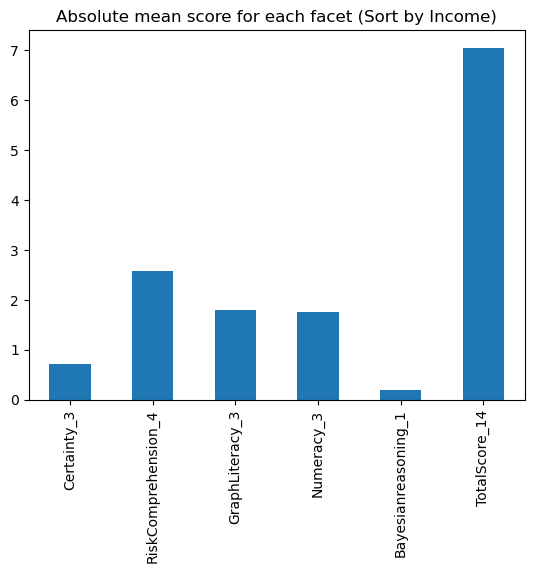

In [9]:
# Absolute mean score for each facet (Sort by Income)

df3[['Certainty_3','RiskComprehension_4','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1','TotalScore_14']].mean(axis = 0).plot(kind = 'bar', title = 'Absolute mean score for each facet (Sort by Income)')

<Axes: title={'center': 'Normalised mean score for each facet (Sort by Income)'}>

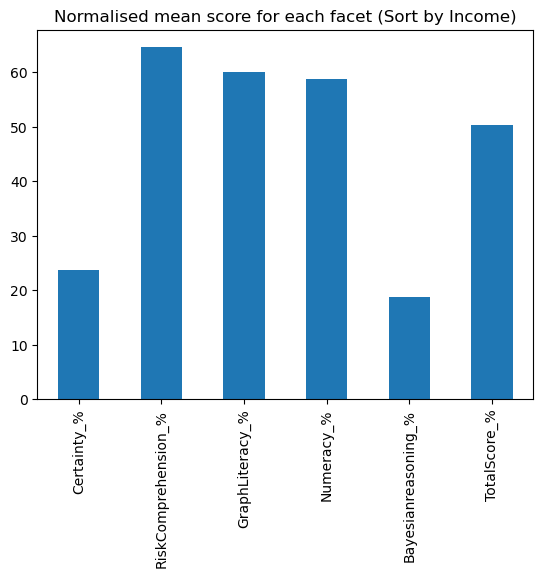

In [10]:
# Normalised mean score for each facet (Sort by Income)

(df3[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0)).plot(kind = 'bar', title = 'Normalised mean score for each facet (Sort by Income)')

In [11]:
# Normalised mean of each facet as a numerical (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean()

Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
income                                                                  
1         20.495495            57.094595        55.780781   49.474474   
2         22.222222            63.131313        61.026936   57.659933   
3         23.937360            63.087248        61.744966   60.514541   
4         25.941423            70.606695        59.972106   62.761506   
5         24.113475            72.340426        63.475177   67.907801   
6         33.333333            74.814815        63.209877   69.135802   

        Bayesianreasoning_%  TotalScore_%  
income                                     
1                 20.045045     44.691120  
2                 15.404040     49.332612  
3                 19.798658     50.767018  
4                 20.083682     53.466826  
5                 19.680851     55.395137  
6                 19.259259     58.253968

In [12]:
# Count of responses for each category (sorted by income)

df3.groupby('income')[['responseid']].count()

responseid
income            
1              444
2              396
3              298
4              239
5              188
6              135

C:\Users\SHIVAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHIVAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHIVAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHIVAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

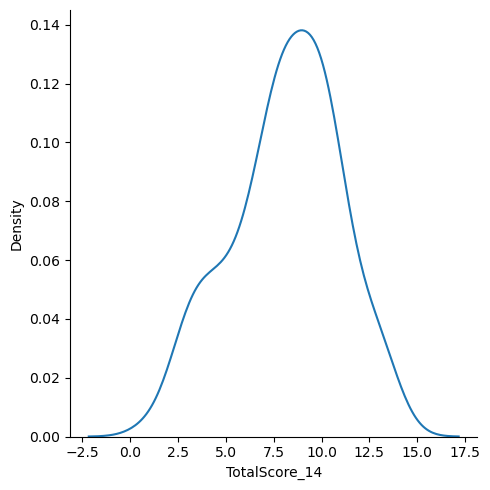

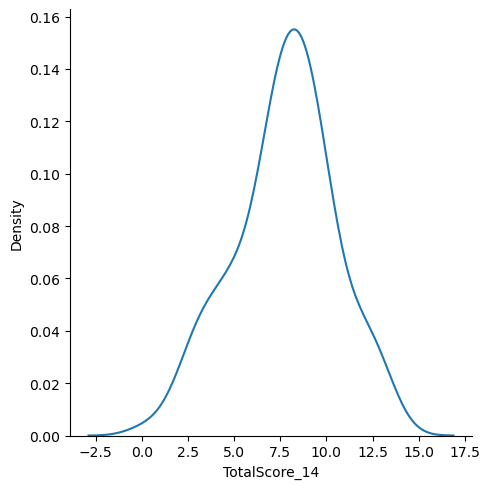

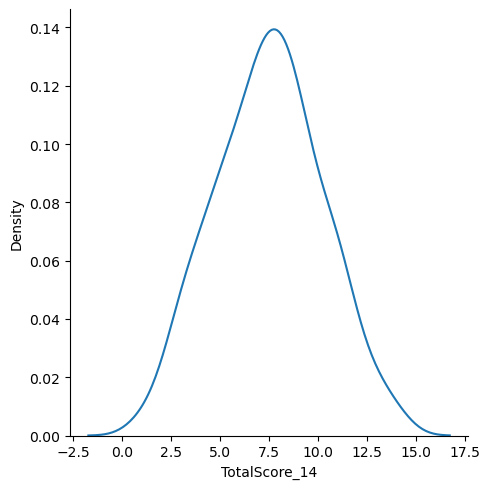

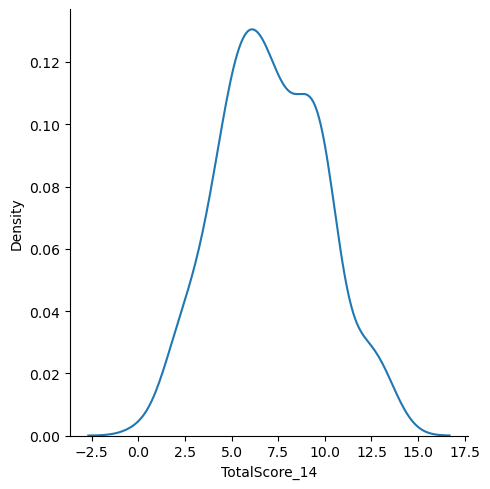

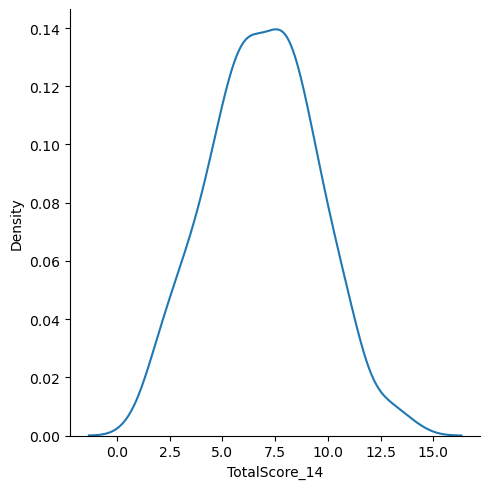

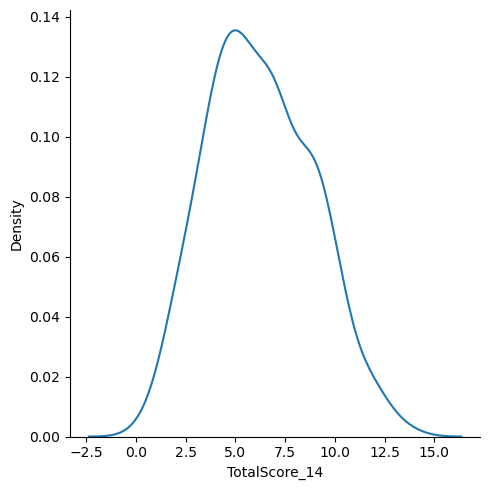

In [125]:
sns.displot( data = df3.loc[ df3["income"] == 6]["TotalScore_14"], kind = "kde")
sns.displot( data = df3.loc[ df3["income"] == 5]["TotalScore_14"], kind = "kde")
sns.displot( data = df3.loc[ df3["income"] == 4]["TotalScore_14"], kind = "kde")
sns.displot( data = df3.loc[ df3["income"] == 3]["TotalScore_14"], kind = "kde")
sns.displot( data = df3.loc[ df3["income"] == 2]["TotalScore_14"], kind = "kde")
sns.displot( data = df3.loc[ df3["income"] == 1]["TotalScore_14"], kind = "kde")

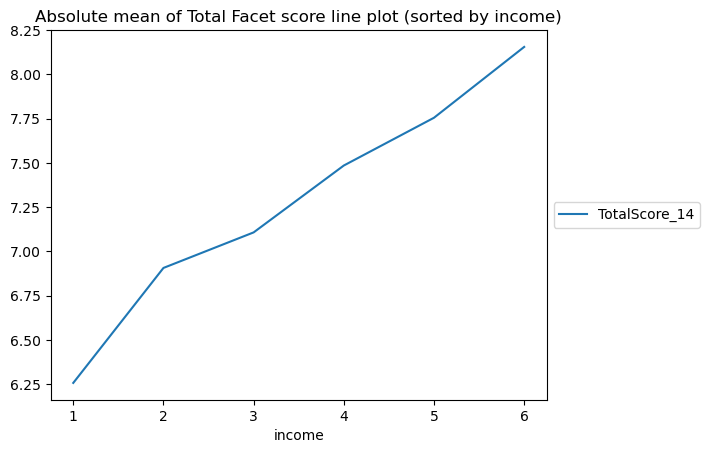

In [13]:
# Absolute mean of Total Facet score line plot (sorted by income)

df3.groupby('income')[['TotalScore_14']].mean().plot( kind = 'line', title = 'Absolute mean of Total Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

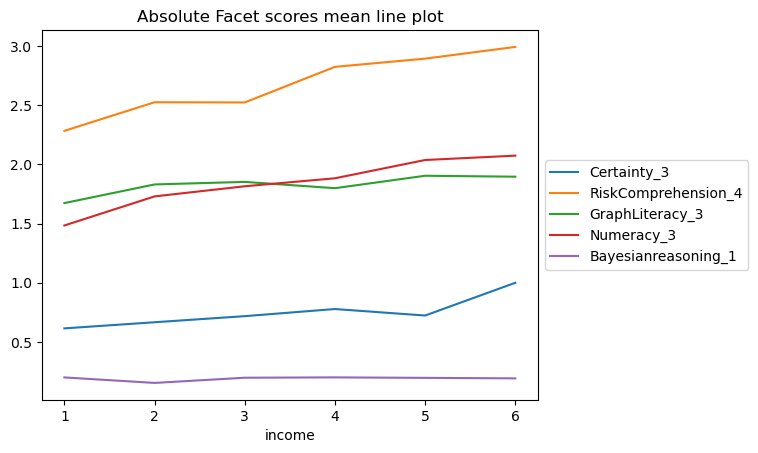

In [14]:
# Absolute mean of each Facet score line plot (sorted by income)

df3.groupby('income')[['Certainty_3','RiskComprehension_4','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

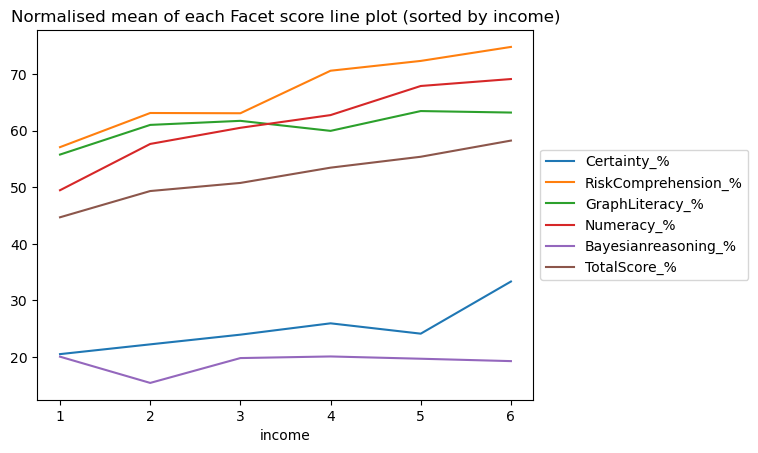

In [15]:
# Normalised mean of each Facet score line plot (sorted by income)


df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%', 'TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised mean of each Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

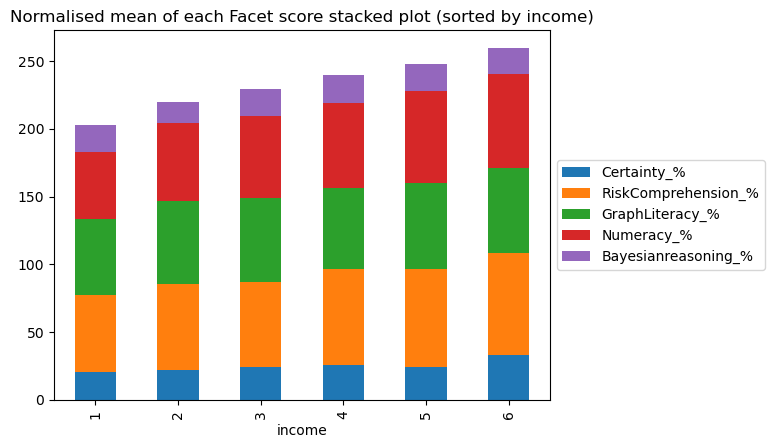

In [16]:
# Normalised mean of each Facet score stacked plot (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean of each Facet score stacked plot (sorted by income)', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

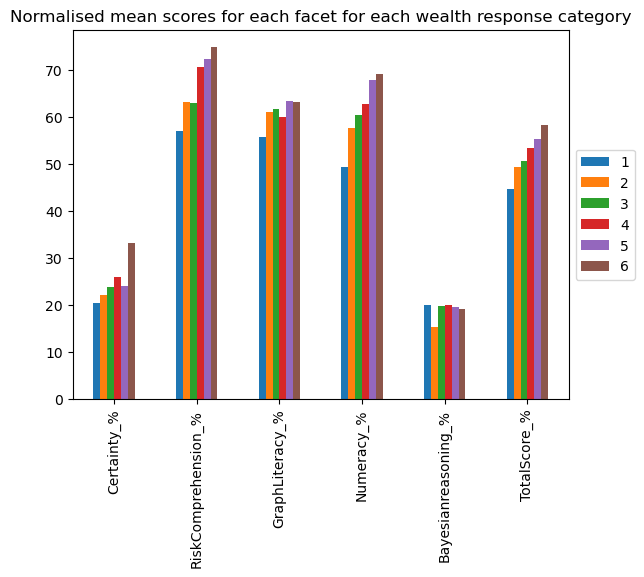

In [17]:
# Normalised mean of each Facet score hist plot (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='income', ylabel='TotalScore_14'>

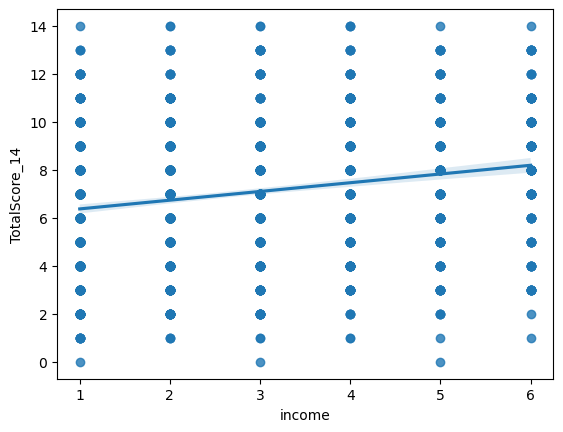

In [18]:
# Trend line for Absolute Total Facet Score vs income

sns.regplot (data = df3, x = 'income', y = 'TotalScore_14')

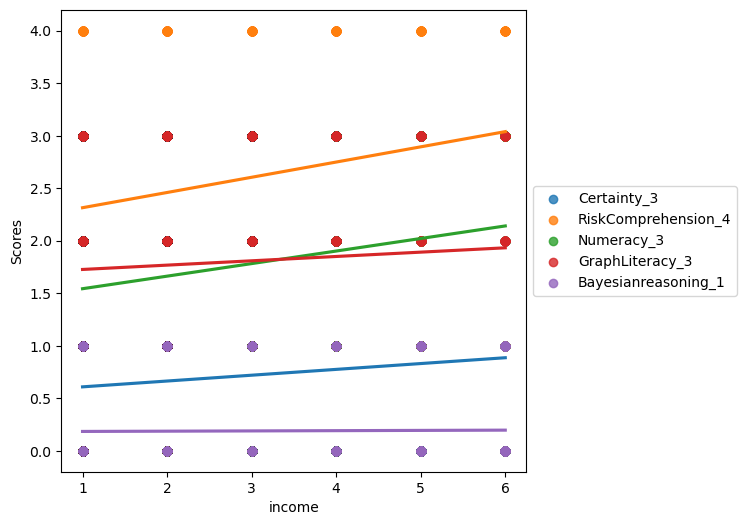

In [19]:
# Trend line for Absolute Independent Facet Score vs income reponses

fig, ax = plt.subplots(figsize=(6, 6))

sns.regplot (data = df3, x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax, label='Certainty_3')
sns.regplot (data = df3, x = 'income', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax, label='RiskComprehension_4')
sns.regplot (data = df3, x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax, label='Numeracy_3')
sns.regplot (data = df3, x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax, label='GraphLiteracy_3')
sns.regplot (data = df3, x = 'income', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax, label='Bayesianreasoning_1' )

ax.set(ylabel='Scores', xlabel='income')
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='income', ylabel='TotalScore_14'>

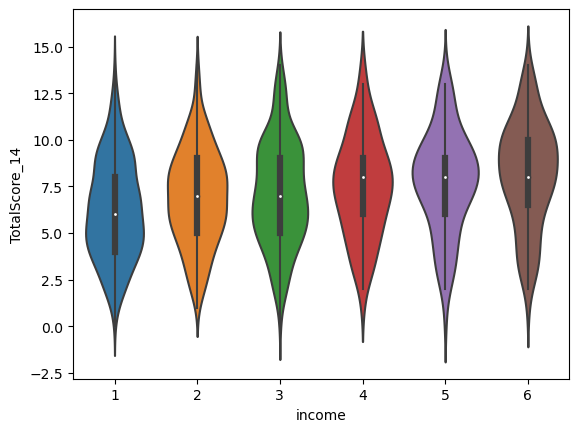

In [20]:
# Violine Plot for TotalScore_14 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'TotalScore_14')

<Axes: xlabel='income', ylabel='Certainty_3'>

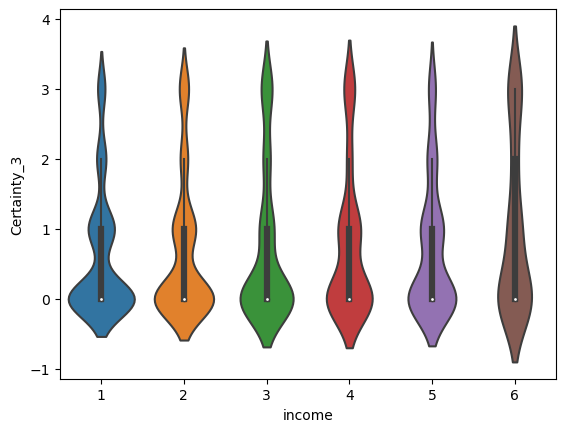

In [21]:
# Violine Plot for Certainty_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Certainty_3')

<Axes: xlabel='income', ylabel='RiskComprehension_4'>

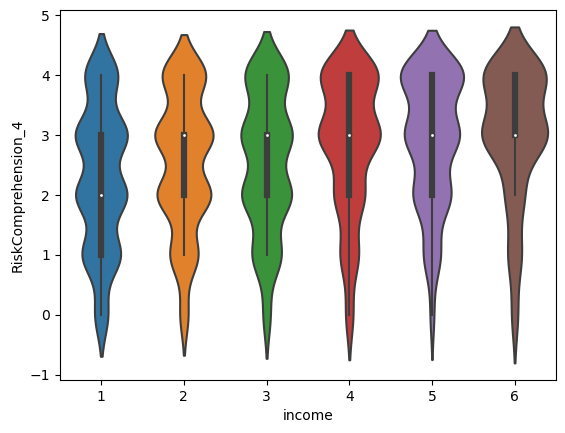

In [22]:
# Violine Plot for RiskComprehension_4 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'RiskComprehension_4')

<Axes: xlabel='income', ylabel='GraphLiteracy_3'>

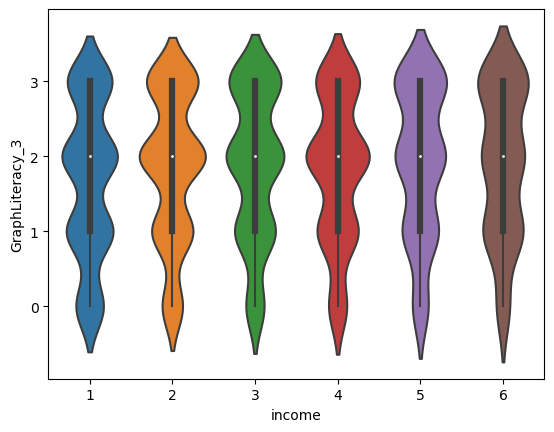

In [23]:
# Violine Plot for GraphLiteracy_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'GraphLiteracy_3')

<Axes: xlabel='income', ylabel='Numeracy_3'>

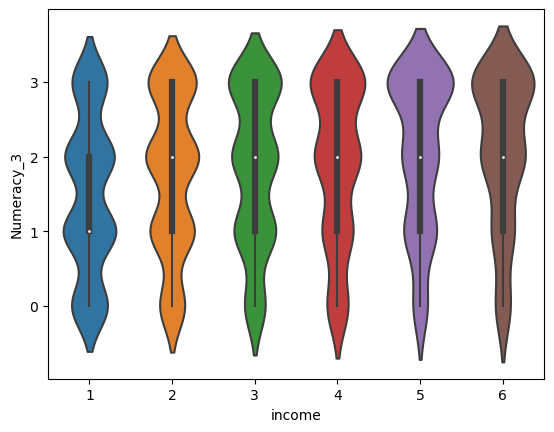

In [24]:
# Violine Plot for Numeracy_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Numeracy_3')

<Axes: xlabel='income', ylabel='Bayesianreasoning_1'>

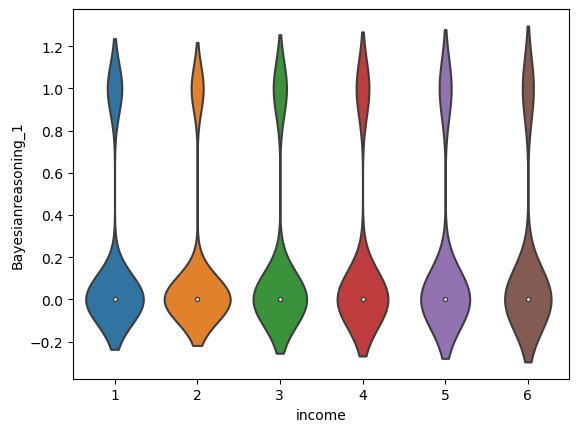

In [25]:
# Violine Plot for TotalScore_14 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Bayesianreasoning_1')

In [26]:
# Data Frame 2 or df2 is an aggregate data on facet total scores and over all total score, along with wealth and income data vs each response. 
# This data set is also sorted by wealth with all responses 'NA' removed.
# We also assign quartiles ranking each response according to this sort.

df4 = df2.sort_values(by = 'wealth')
df4 = df4.reset_index(drop = True)
df4 = df4.dropna(axis = 0, subset = 'wealth')
df4.insert(loc = len(df4.columns), column = "Quartile Number", value = pd.qcut(df4["wealth"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df4

responseid  age  age_rec  isced  income     wealth  Certainty_3  \
0           7204   57        3      2       1        0.0            0   
1           1076   39        3      3       2        0.0            3   
2            568   71        4      3       6        0.0            0   
3            262   62        4      2       2        0.0            0   
4            887   70        4      3       1        0.0            1   
...          ...  ...      ...    ...     ...        ...          ...   
1117        3160   49        3      1       4  4500000.0            1   
1118        1519   71        4      3       2  5000000.0            1   
1119        6471   71        4      2       3  5000000.0            0   
1120          97   24        2      1       4  5000000.0            3   
1121         706   28        2      3       1  5000000.0            3   

      RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
0                       3                3           2                    0   
1                       3                3           2                    0   
2                       2                0           1                    0   
3                       1                2           2                    0   
4                       1                2           2                    0   
...                   ...              ...         ...                  ...   
1117                    4                2           2                    0   
1118                    3                0           0                    0   
1119                    1                2           3                    0   
1120                    3                2           0                    1   
1121                    4                2           3                    0   

      Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0        0.000000                 75.0       100.000000   66.666667   
1      100.000000                 75.0       100.000000   66.666667   
2        0.000000                 50.0         0.000000   33.333333   
3        0.000000                 25.0        66.666667   66.666667   
4       33.333333                 25.0        66.666667   66.666667   
...           ...                  ...              ...         ...   
1117    33.333333                100.0        66.666667   66.666667   
1118    33.333333                 75.0         0.000000    0.000000   
1119     0.000000                 25.0        66.666667  100.000000   
1120   100.000000                 75.0        66.666667    0.000000   
1121   100.000000                100.0        66.666667  100.000000   

      Bayesianreasoning_%  TotalScore_14  TotalScore_%  Quartile Number  
0                     0.0              8     57.142857                1  
1                     0.0             11     78.571429                1  
2                     0.0              3     21.428571                1  
3                     0.0              5     35.714286                1  
4                     0.0              6     42.857143                1  
...                   ...            ...           ...              ...  
1117                  0.0              9     64.285714                4  
1118                  0.0              4     28.571429                4  
1119                  0.0              6     42.857143                4  
1120                100.0              9     64.285714                4  
1121                  0.0             12     85.714286                4  

[1122 rows x 19 columns]

<Axes: title={'center': 'Absolute mean score for each facet (Sort by Wealth)'}>

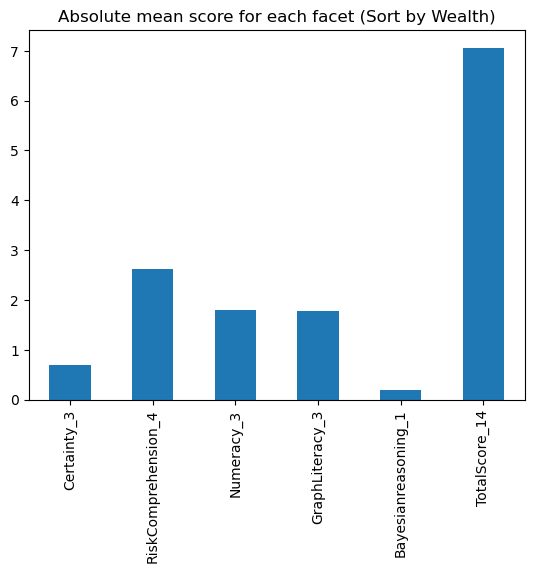

In [27]:
# Absolute mean score for each facet (Sort by Wealth)

df4[['Certainty_3','RiskComprehension_4','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1','TotalScore_14']].mean(axis = 0).plot(kind = 'bar', title = 'Absolute mean score for each facet (Sort by Wealth)')

<Axes: title={'center': 'Normalised mean score for each facet (Sort by Wealth)'}>

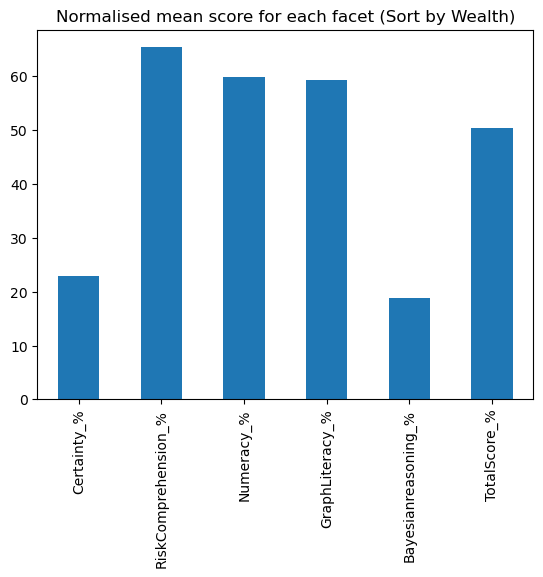

In [28]:
# Normalised mean score for each facet (Sort by Wealth)

(df4[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0)).plot(kind = 'bar', title = 'Normalised mean score for each facet (Sort by Wealth)')

<Axes: title={'center': 'Total responses line plot sorted by Wealth'}, xlabel='Unique responses sorted by wealth', ylabel='TotalScore_14'>

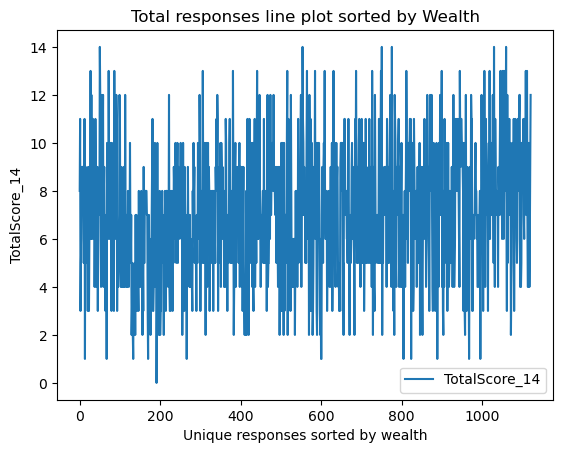

In [29]:
# Line Plot of Absolute Total Facet score vs sorted wealth

df4.plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total responses line plot sorted by Wealth',xlabel = 'Unique responses sorted by wealth', ylabel = 'TotalScore_14')

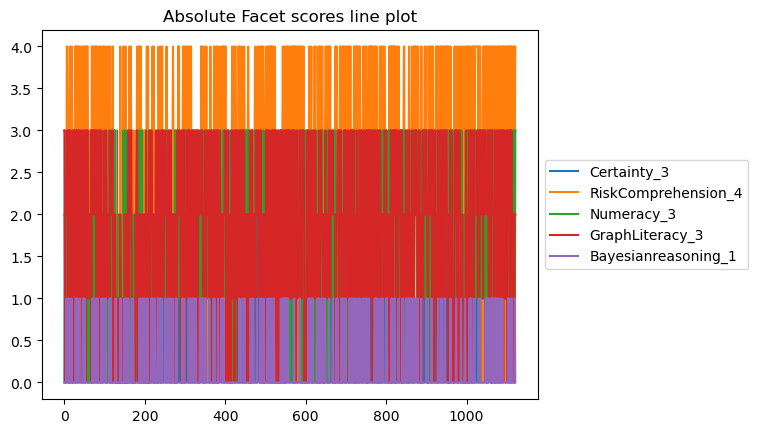

In [30]:
# Absolute Facet scores line plot from low to high wealth 
# I do understand that this is non readable

df4[['Certainty_3','RiskComprehension_4','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].plot( kind = 'line', title = 'Absolute Facet scores line plot', use_index = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: ylabel='TotalScore_14'>

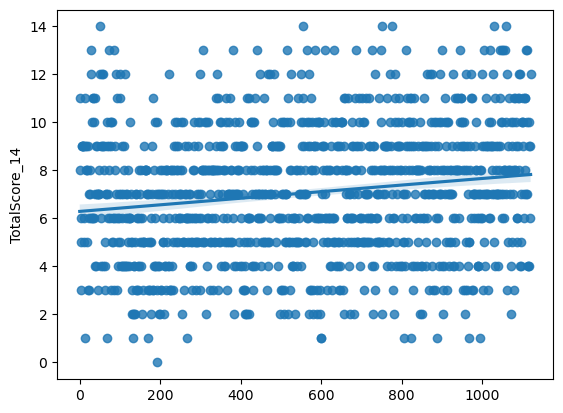

In [31]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses

sns.regplot (data = df4, x = df4.index, y = 'TotalScore_14')

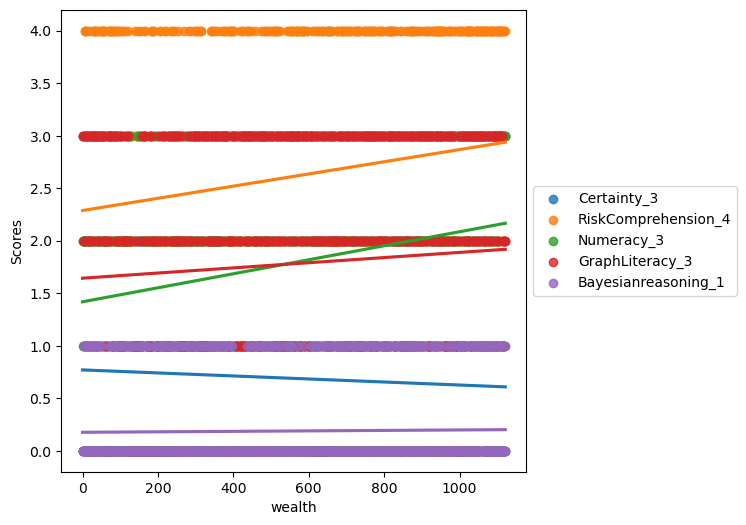

In [32]:
# Trend line for Absolute Independent Facet Score vs wealth reponses

fig1, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = df4.index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax1, label='Certainty_3')
sns.regplot (data = df4, x = df4.index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax1, label='RiskComprehension_4')
sns.regplot (data = df4, x = df4.index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax1, label='Numeracy_3')
sns.regplot (data = df4, x = df4.index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax1, label='GraphLiteracy_3')
sns.regplot (data = df4, x = df4.index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax1, label='Bayesianreasoning_1' )

ax1.set(ylabel='Scores', xlabel='wealth')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [33]:
# Count of number of responses under each quartile

df4.groupby('Quartile Number')[['Quartile Number']].count()

Quartile Number
Quartile Number                 
1                            290
2                            271
3                            282
4                            279

In [34]:
df4.loc[df4['Quartile Number']==1]

responseid  age  age_rec  isced  income  wealth  Certainty_3  \
0          7204   57        3      2       1     0.0            0   
1          1076   39        3      3       2     0.0            3   
2           568   71        4      3       6     0.0            0   
3           262   62        4      2       2     0.0            0   
4           887   70        4      3       1     0.0            1   
..          ...  ...      ...    ...     ...     ...          ...   
285        9763   31        2      1       5  2000.0            1   
286         125   37        3      2       4  2000.0            1   
287         639   72        4      3       2  2000.0            0   
288         648   62        4      3       2  2000.0            0   
289        8119   39        3      2       3  2000.0            0   

     RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
0                      3                3           2                    0   
1                      3                3           2                    0   
2                      2                0           1                    0   
3                      1                2           2                    0   
4                      1                2           2                    0   
..                   ...              ...         ...                  ...   
285                    4                3           1                    0   
286                    1                2           1                    0   
287                    1                2           3                    0   
288                    2                3           1                    0   
289                    2                1           2                    0   

     Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0       0.000000                 75.0       100.000000   66.666667   
1     100.000000                 75.0       100.000000   66.666667   
2       0.000000                 50.0         0.000000   33.333333   
3       0.000000                 25.0        66.666667   66.666667   
4      33.333333                 25.0        66.666667   66.666667   
..           ...                  ...              ...         ...   
285    33.333333                100.0       100.000000   33.333333   
286    33.333333                 25.0        66.666667   33.333333   
287     0.000000                 25.0        66.666667  100.000000   
288     0.000000                 50.0       100.000000   33.333333   
289     0.000000                 50.0        33.333333   66.666667   

     Bayesianreasoning_%  TotalScore_14  TotalScore_%  Quartile Number  
0                    0.0              8     57.142857                1  
1                    0.0             11     78.571429                1  
2                    0.0              3     21.428571                1  
3                    0.0              5     35.714286                1  
4                    0.0              6     42.857143                1  
..                   ...            ...           ...              ...  
285                  0.0              9     64.285714                1  
286                  0.0              5     35.714286                1  
287                  0.0              6     42.857143                1  
288                  0.0              6     42.857143                1  
289                  0.0              5     35.714286                1  

[290 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q1'}, xlabel='Unique responses', ylabel='TotalScore_14'>

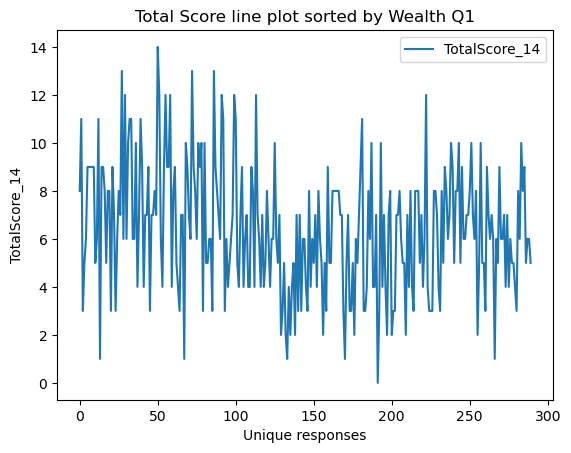

In [35]:
# This graph is basically a line plot of the TotalScore_14 across first quartile unique responses which are ordered by income

df4.loc[df4['Quartile Number']==1].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total Score line plot sorted by Wealth Q1',xlabel = 'Unique responses', ylabel = 'TotalScore_14')

<Axes: ylabel='TotalScore_14'>

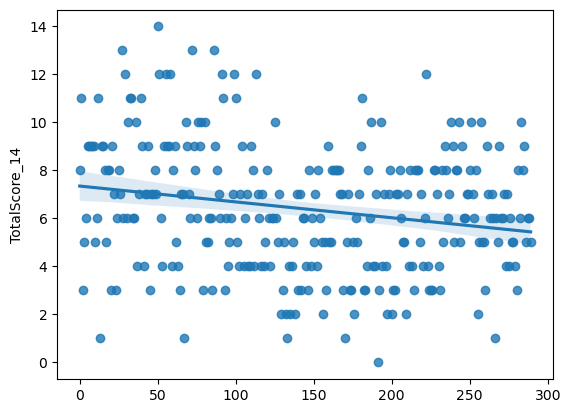

In [36]:
# Trend line for Absolute Total Facet Score vs unique Q14. Income reponses in Quartile 1

sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'TotalScore_14')

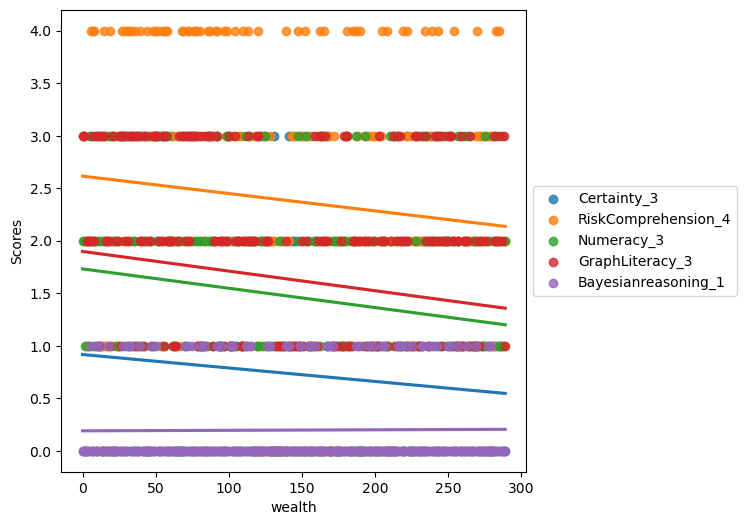

In [37]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 1

fig1, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax2, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax2, label='RiskComprehension_4')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax2, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax2, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==1], x = df4.loc[df4['Quartile Number']==1].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax2, label='Bayesianreasoning_1' )

ax2.set(ylabel='Scores', xlabel='wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [38]:
df4.loc[df4['Quartile Number']==2]

responseid  age  age_rec  isced  income   wealth  Certainty_3  \
290       11209   21        2      1       2   2500.0            1   
291        8599   42        3      3       1   2500.0            1   
292        6060   33        2      1       3   2500.0            0   
293        2663   70        4      2       3   2500.0            0   
294        1389   49        3      2       1   2500.0            2   
..          ...  ...      ...    ...     ...      ...          ...   
556        5673   39        3      1       4  40000.0            1   
557         935   56        3      2       3  40000.0            0   
558        1144   55        3      2       4  40000.0            1   
559        2257   56        3      2       1  42000.0            1   
560        5524   41        3      2       4  42000.0            0   

     RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
290                    2                0           0                    0   
291                    2                3           1                    0   
292                    2                1           2                    0   
293                    3                1           0                    1   
294                    3                3           2                    0   
..                   ...              ...         ...                  ...   
556                    3                3           2                    1   
557                    3                3           1                    0   
558                    4                1           3                    0   
559                    1                3           2                    0   
560                    3                3           2                    0   

     Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
290    33.333333                 50.0         0.000000    0.000000   
291    33.333333                 50.0       100.000000   33.333333   
292     0.000000                 50.0        33.333333   66.666667   
293     0.000000                 75.0        33.333333    0.000000   
294    66.666667                 75.0       100.000000   66.666667   
..           ...                  ...              ...         ...   
556    33.333333                 75.0       100.000000   66.666667   
557     0.000000                 75.0       100.000000   33.333333   
558    33.333333                100.0        33.333333  100.000000   
559    33.333333                 25.0       100.000000   66.666667   
560     0.000000                 75.0       100.000000   66.666667   

     Bayesianreasoning_%  TotalScore_14  TotalScore_%  Quartile Number  
290                  0.0              3     21.428571                2  
291                  0.0              7     50.000000                2  
292                  0.0              5     35.714286                2  
293                100.0              5     35.714286                2  
294                  0.0             10     71.428571                2  
..                   ...            ...           ...              ...  
556                100.0             10     71.428571                2  
557                  0.0              7     50.000000                2  
558                  0.0              9     64.285714                2  
559                  0.0              7     50.000000                2  
560                  0.0              8     57.142857                2  

[271 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q1'}, xlabel='Unique responses', ylabel='TotalScore_14'>

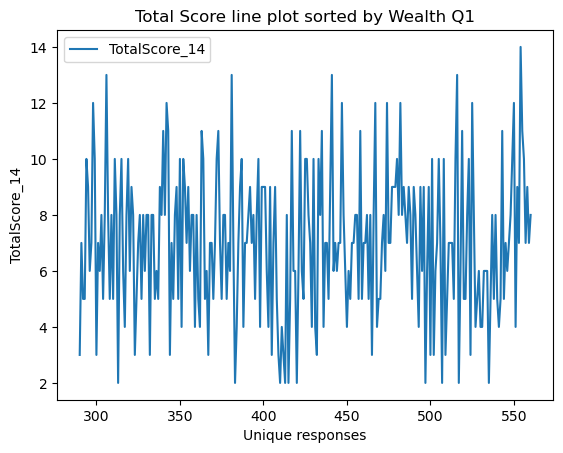

In [39]:
# This graph is basically a line plot of the TotalScore_14 across second quartile unique responses which are ordered by income

df4.loc[df4['Quartile Number']==2].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total Score line plot sorted by Wealth Q1',xlabel = 'Unique responses', ylabel = 'TotalScore_14')

<Axes: ylabel='TotalScore_14'>

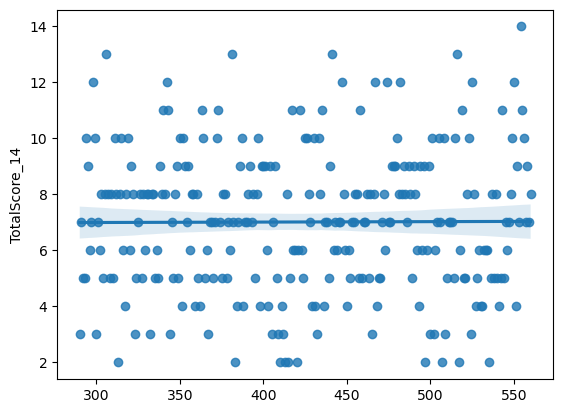

In [40]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses in Quartile 2

sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'TotalScore_14')

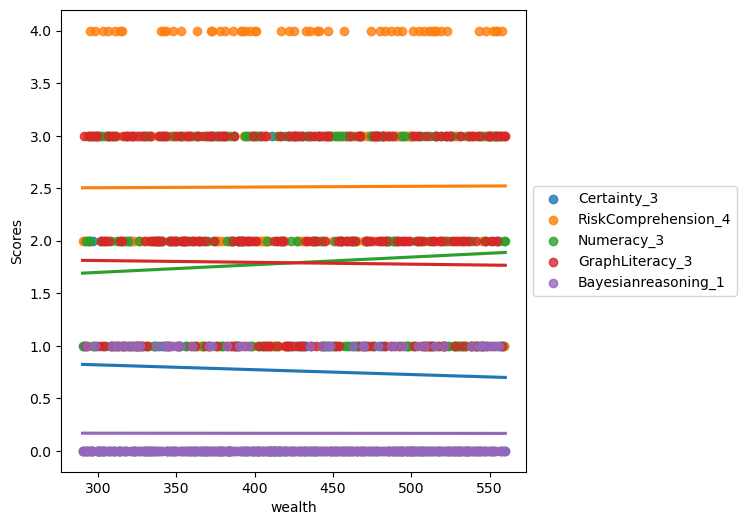

In [41]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 2

fig1, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax3, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax3, label='RiskComprehension_4')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax3, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax3, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==2], x = df4.loc[df4['Quartile Number']==2].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax3, label='Bayesianreasoning_1' )

ax3.set(ylabel='Scores', xlabel='wealth')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [42]:
df4.loc[df4['Quartile Number']==3]

responseid  age  age_rec  isced  income    wealth  Certainty_3  \
561        9500   75        4      2       7   43654.0            1   
562         711   61        4      2       3   45000.0            0   
563        5337   26        2      1       3   45000.0            0   
564       11018   33        2      1       2   50000.0            2   
565        2094   55        3      2       3   50000.0            3   
..          ...  ...      ...    ...     ...       ...          ...   
838        6522   23        2      3       5  200000.0            1   
839       10125   66        4      2       7  200000.0            0   
840        9017   63        4      2       1  200000.0            1   
841        8754   52        3      2       1  200000.0            0   
842        2831   42        3      2       4  200000.0            2   

     RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
561                    3                1           0                    0   
562                    2                2           3                    0   
563                    2                1           2                    0   
564                    4                1           3                    0   
565                    4                3           3                    0   
..                   ...              ...         ...                  ...   
838                    3                0           0                    0   
839                    3                3           2                    0   
840                    3                2           2                    1   
841                    3                2           3                    0   
842                    1                0           1                    1   

     Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
561    33.333333                 75.0        33.333333    0.000000   
562     0.000000                 50.0        66.666667  100.000000   
563     0.000000                 50.0        33.333333   66.666667   
564    66.666667                100.0        33.333333  100.000000   
565   100.000000                100.0       100.000000  100.000000   
..           ...                  ...              ...         ...   
838    33.333333                 75.0         0.000000    0.000000   
839     0.000000                 75.0       100.000000   66.666667   
840    33.333333                 75.0        66.666667   66.666667   
841     0.000000                 75.0        66.666667  100.000000   
842    66.666667                 25.0         0.000000   33.333333   

     Bayesianreasoning_%  TotalScore_14  TotalScore_%  Quartile Number  
561                  0.0              5     35.714286                3  
562                  0.0              7     50.000000                3  
563                  0.0              5     35.714286                3  
564                  0.0             10     71.428571                3  
565                  0.0             13     92.857143                3  
..                   ...            ...           ...              ...  
838                  0.0              4     28.571429                3  
839                  0.0              8     57.142857                3  
840                100.0              9     64.285714                3  
841                  0.0              8     57.142857                3  
842                100.0              5     35.714286                3  

[282 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q3'}, xlabel='Unique responses', ylabel='TotalScore_14'>

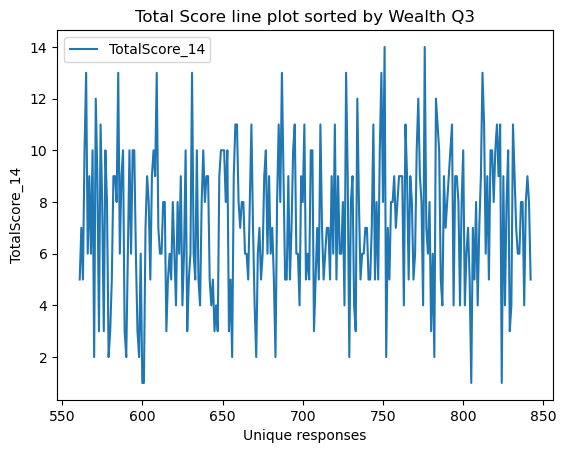

In [43]:
# This graph is basically a line plot of the TotalScore_14 across third quartile unique responses which are ordered by wealth

df4.loc[df4['Quartile Number']==3].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total Score line plot sorted by Wealth Q3',xlabel = 'Unique responses', ylabel = 'TotalScore_14')

<Axes: ylabel='TotalScore_14'>

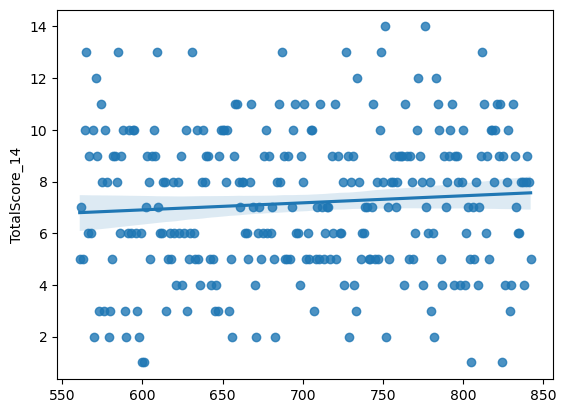

In [44]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses in Quartile 3

sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'TotalScore_14')

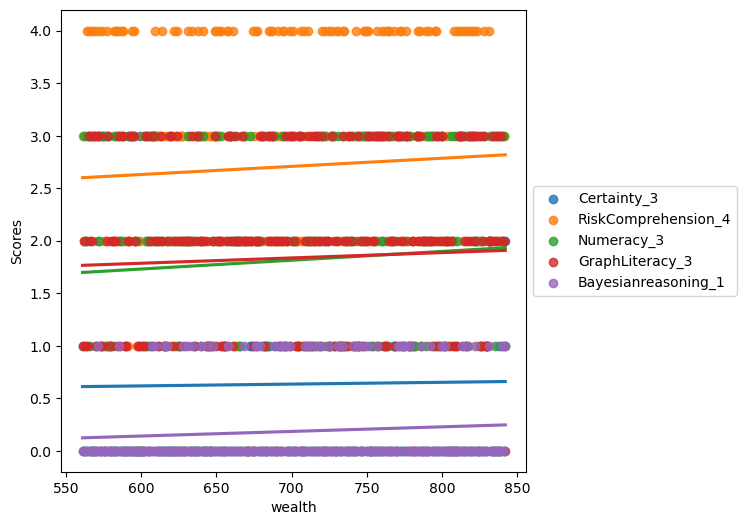

In [45]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 3

fig1, ax4 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax4, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax4, label='RiskComprehension_4')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax4, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax4, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==3], x = df4.loc[df4['Quartile Number']==3].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax4, label='Bayesianreasoning_1' )

ax4.set(ylabel='Scores', xlabel='wealth')
ax4.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [46]:
df4.loc[df4['Quartile Number']==4]

responseid  age  age_rec  isced  income     wealth  Certainty_3  \
843         5864   48        3      1       4   220000.0            0   
844         8570   25        2      1       6   220000.0            0   
845         2623   59        3      1       2   220000.0            1   
846        13145   61        4      2       2   220000.0            0   
847        10672   63        4      2       6   250000.0            0   
...          ...  ...      ...    ...     ...        ...          ...   
1117        3160   49        3      1       4  4500000.0            1   
1118        1519   71        4      3       2  5000000.0            1   
1119        6471   71        4      2       3  5000000.0            0   
1120          97   24        2      1       4  5000000.0            3   
1121         706   28        2      3       1  5000000.0            3   

      RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
843                     3                2           3                    0   
844                     4                1           3                    0   
845                     4                2           3                    0   
846                     1                1           0                    0   
847                     3                1           2                    0   
...                   ...              ...         ...                  ...   
1117                    4                2           2                    0   
1118                    3                0           0                    0   
1119                    1                2           3                    0   
1120                    3                2           0                    1   
1121                    4                2           3                    0   

      Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
843      0.000000                 75.0        66.666667  100.000000   
844      0.000000                100.0        33.333333  100.000000   
845     33.333333                100.0        66.666667  100.000000   
846      0.000000                 25.0        33.333333    0.000000   
847      0.000000                 75.0        33.333333   66.666667   
...           ...                  ...              ...         ...   
1117    33.333333                100.0        66.666667   66.666667   
1118    33.333333                 75.0         0.000000    0.000000   
1119     0.000000                 25.0        66.666667  100.000000   
1120   100.000000                 75.0        66.666667    0.000000   
1121   100.000000                100.0        66.666667  100.000000   

      Bayesianreasoning_%  TotalScore_14  TotalScore_%  Quartile Number  
843                   0.0              8     57.142857                4  
844                   0.0              8     57.142857                4  
845                   0.0             10     71.428571                4  
846                   0.0              2     14.285714                4  
847                   0.0              6     42.857143                4  
...                   ...            ...           ...              ...  
1117                  0.0              9     64.285714                4  
1118                  0.0              4     28.571429                4  
1119                  0.0              6     42.857143                4  
1120                100.0              9     64.285714                4  
1121                  0.0             12     85.714286                4  

[279 rows x 19 columns]

<Axes: title={'center': 'Total Score line plot sorted by Wealth Q4'}, xlabel='Unique responses', ylabel='TotalScore_14'>

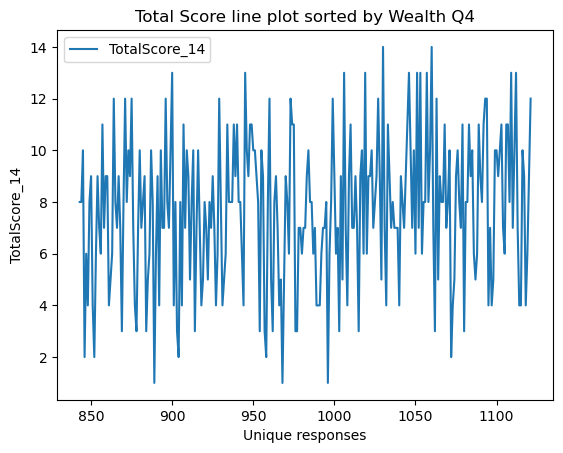

In [47]:
# This graph is basically a line plot of the TotalScore_14 across fourth quartile unique responses which are ordered by Wealth

df4.loc[df4['Quartile Number']==4].plot(use_index = 'True' , kind = 'line', y = ['TotalScore_14'], title = 'Total Score line plot sorted by Wealth Q4',xlabel = 'Unique responses', ylabel = 'TotalScore_14')

<Axes: ylabel='TotalScore_14'>

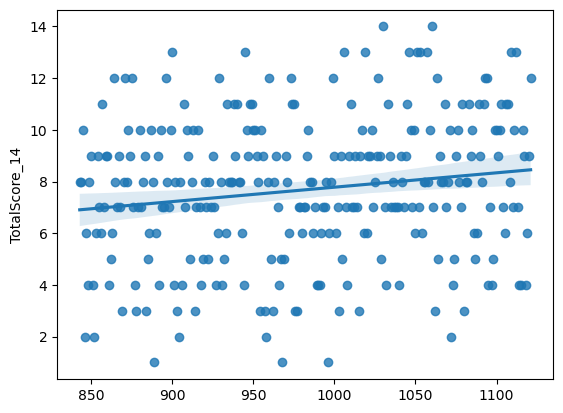

In [48]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses in Quartile 4

sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'TotalScore_14')

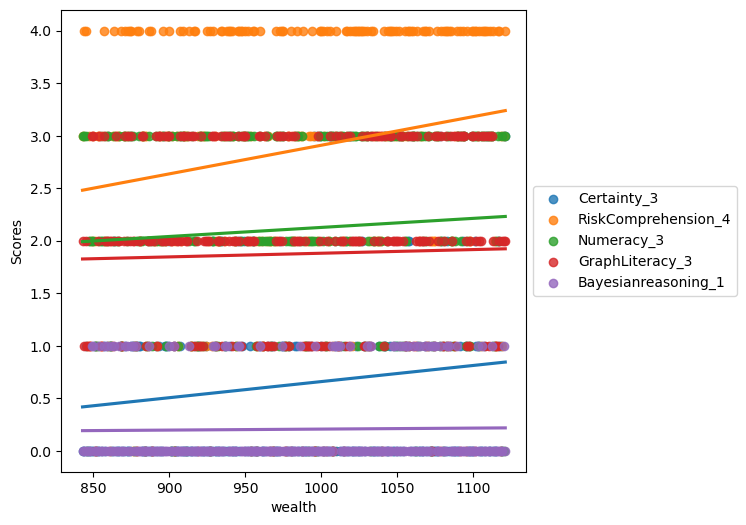

In [49]:
# Trend line for Absolute Independent Facet Score vs wealth reponses in Quartile 4

fig1, ax5 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Certainty_3', fit_reg=True, ci=None, ax=ax5, label='Certainty_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax5, label='RiskComprehension_4')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax5, label='Numeracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax5, label='GraphLiteracy_3')
sns.regplot (data = df4.loc[df4['Quartile Number']==4], x = df4.loc[df4['Quartile Number']==4].index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax5, label='Bayesianreasoning_1' )

ax5.set(ylabel='Scores', xlabel='wealth')
ax5.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

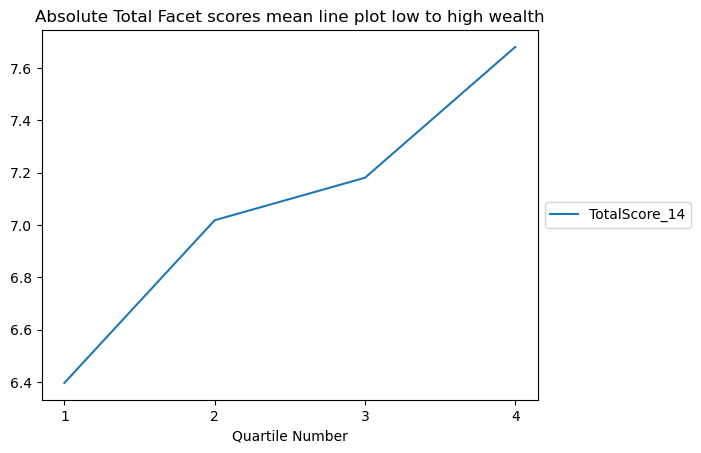

In [50]:
# Absolute Total Facet scores mean line plot from low to high Wealth

df4.groupby('Quartile Number')[['TotalScore_14']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

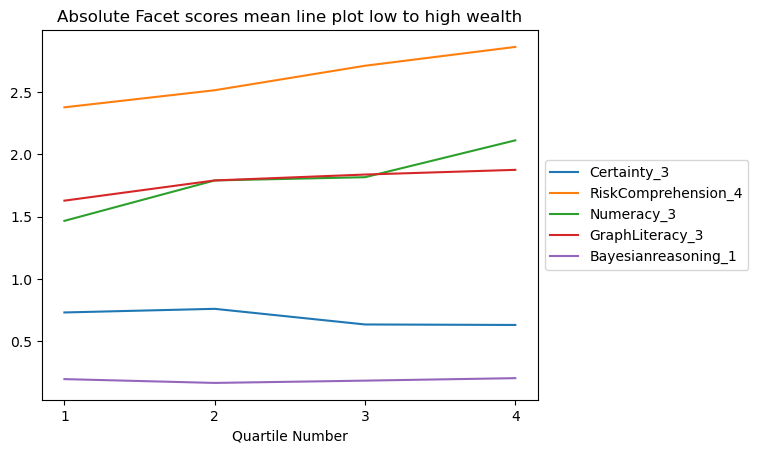

In [51]:
# Absolute Facet scores mean line plot from low to high wealth

df4.groupby('Quartile Number')[['Certainty_3','RiskComprehension_4','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

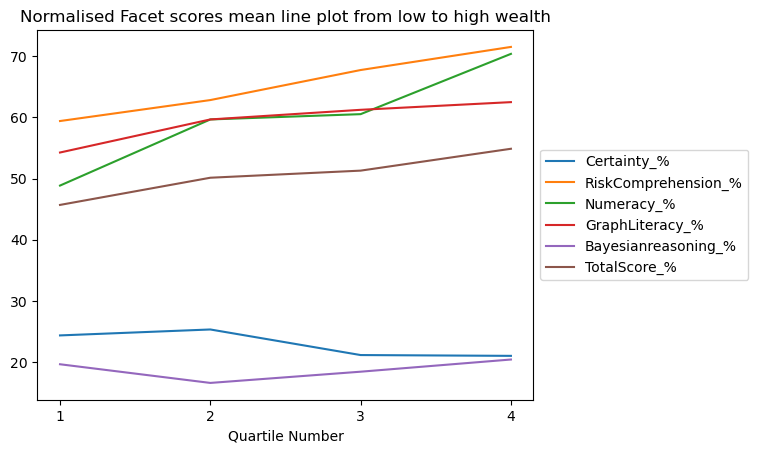

In [52]:
# Normalised Facet scores mean line plot from low to high wealth


df4.groupby('Quartile Number')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot from low to high wealth',  xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

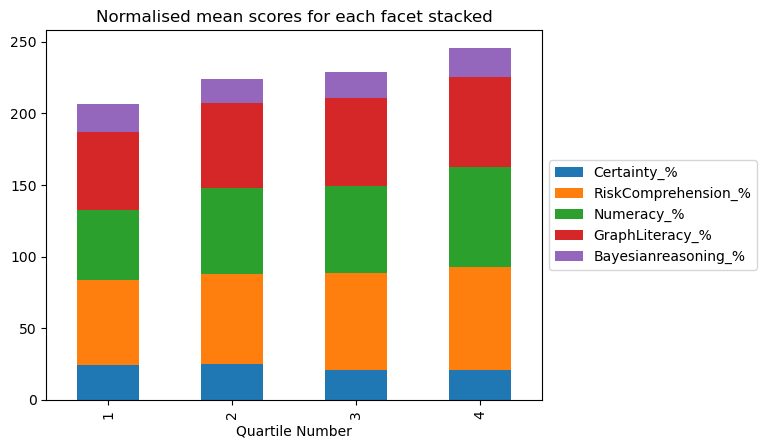

In [53]:
# Normalised mean scores for each facet stacked

df4.groupby('Quartile Number')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

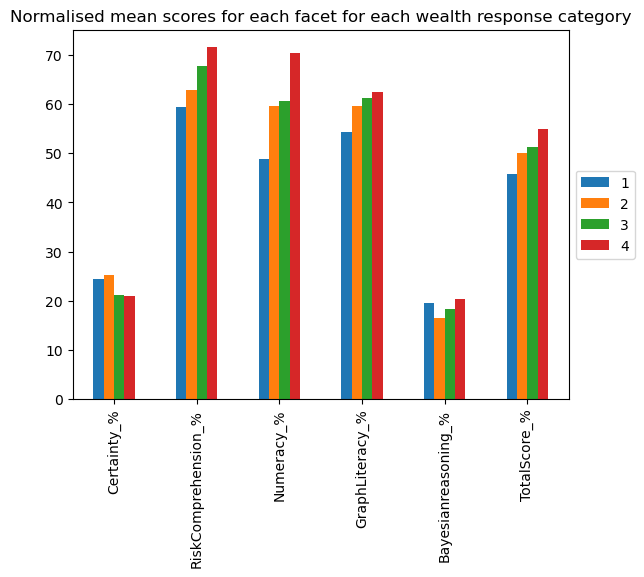

In [54]:
# Normalised mean scores for each facet for each wealth response Quartile

df4.groupby('Quartile Number')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='Quartile Number', ylabel='TotalScore_14'>

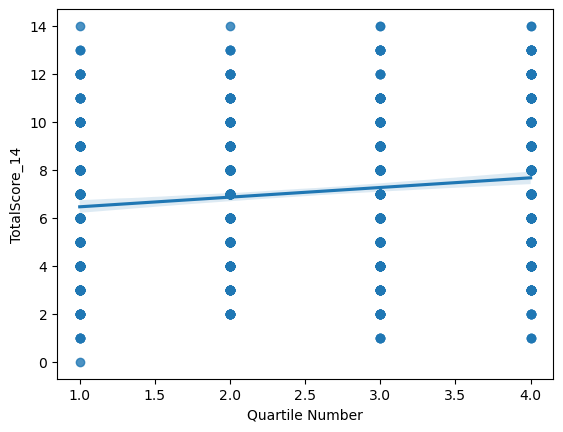

In [55]:
# Trend line for Absolute Total Facet Score vs Quartiles

sns.regplot (data = df4, x = 'Quartile Number', y = 'TotalScore_14')

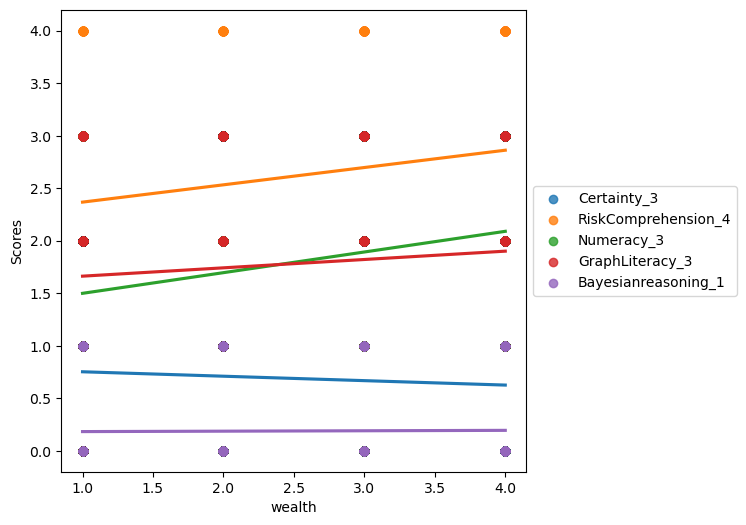

In [56]:
# Trend line for Absolute Independent Facet Score vs Quartiles

fig2, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = 'Quartile Number', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax2, label='Certainty_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax2, label='RiskComprehension_4')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax2, label='Numeracy_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax2, label='GraphLiteracy_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax2, label='Bayesianreasoning_1' )

ax2.set(ylabel='Scores', xlabel='wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='Quartile Number', ylabel='TotalScore_14'>

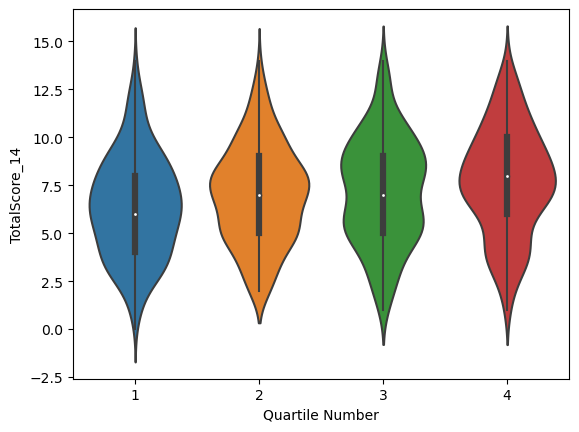

In [57]:
# Violine Plot for TotalScore_14 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'TotalScore_14')

<Axes: xlabel='Quartile Number', ylabel='Certainty_3'>

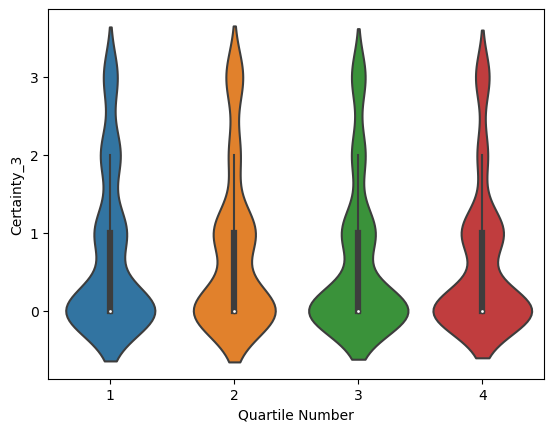

In [58]:
# Violine Plot for Certainty_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Certainty_3')

<Axes: xlabel='Quartile Number', ylabel='RiskComprehension_4'>

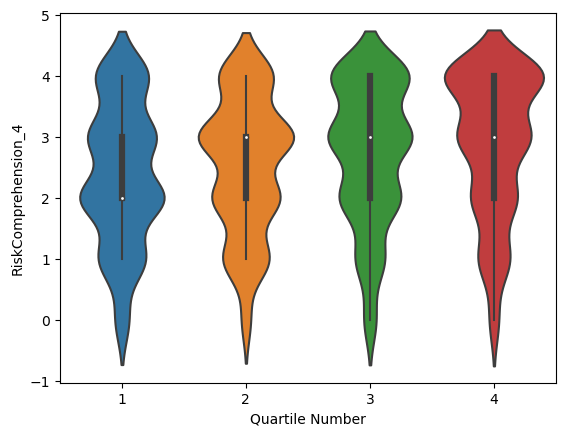

In [59]:
# Violine Plot for RiskComprehension_4 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'RiskComprehension_4')

<Axes: xlabel='Quartile Number', ylabel='GraphLiteracy_3'>

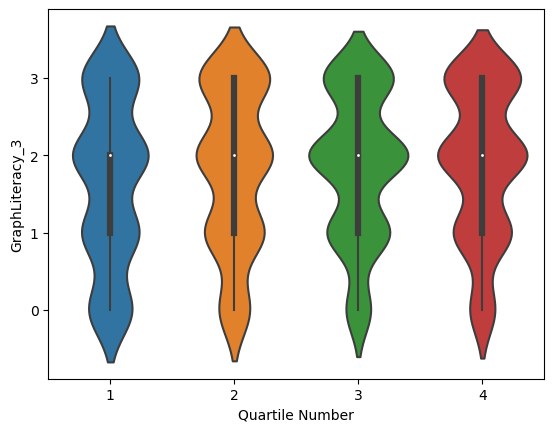

In [60]:
# Violine Plot for GraphLiteracy_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3')

<Axes: xlabel='Quartile Number', ylabel='Numeracy_3'>

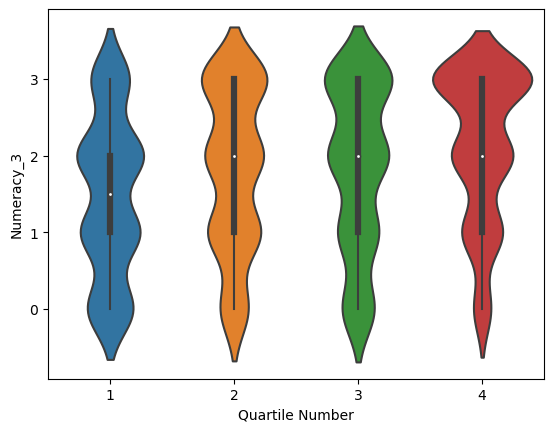

In [61]:
# Violine Plot for Numeracy_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Numeracy_3')

<Axes: xlabel='Quartile Number', ylabel='Bayesianreasoning_1'>

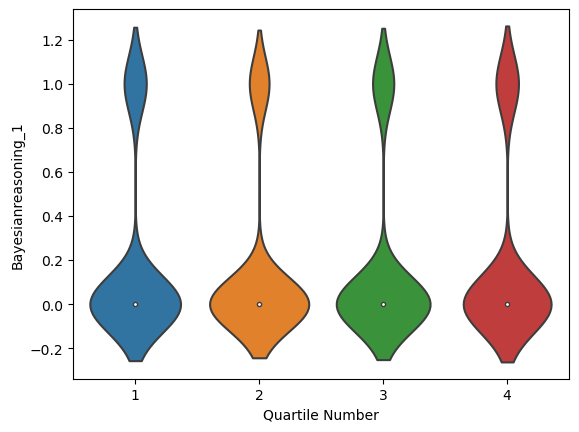

In [62]:
# Violine Plot for Bayesianreasoning_1 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1')

In [63]:
# Data Frame 5 or df5 is an aggregate data on facet total scores and over all total score, along with  education data vs each response. 
# This data set is now sorted by education.

df5 = df2.sort_values(by = 'isced')
df5 = df5.reset_index(drop = True)

df5

responseid  age  age_rec  isced  income    wealth  Certainty_3  \
0          10237   42        3      1       6   50000.0            1   
1             32   31        2      1       2       NaN            2   
2           5234   28        2      1       2       NaN            0   
3            118   33        2      1       1  120000.0            0   
4           2842   26        2      1       3  200000.0            0   
...          ...  ...      ...    ...     ...       ...          ...   
1948        1456   36        3      3       1       NaN            2   
1949        2846   47        3      3       2  200000.0            0   
1950        8284   38        3      3       1  450000.0            0   
1951        8253   50        3      3       1       0.0            0   
1952        2671   73        4      3       3    1200.0            0   

      RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
0                       4                2           3                    0   
1                       4                2           3                    0   
2                       4                2           3                    0   
3                       1                1           0                    0   
4                       3                2           3                    0   
...                   ...              ...         ...                  ...   
1948                    3                2           2                    1   
1949                    3                1           0                    0   
1950                    1                1           0                    0   
1951                    2                1           2                    1   
1952                    2                3           1                    0   

      Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0       33.333333                100.0        66.666667  100.000000   
1       66.666667                100.0        66.666667  100.000000   
2        0.000000                100.0        66.666667  100.000000   
3        0.000000                 25.0        33.333333    0.000000   
4        0.000000                 75.0        66.666667  100.000000   
...           ...                  ...              ...         ...   
1948    66.666667                 75.0        66.666667   66.666667   
1949     0.000000                 75.0        33.333333    0.000000   
1950     0.000000                 25.0        33.333333    0.000000   
1951     0.000000                 50.0        33.333333   66.666667   
1952     0.000000                 50.0       100.000000   33.333333   

      Bayesianreasoning_%  TotalScore_14  TotalScore_%  
0                     0.0             10     71.428571  
1                     0.0             11     78.571429  
2                     0.0              9     64.285714  
3                     0.0              2     14.285714  
4                     0.0              8     57.142857  
...                   ...            ...           ...  
1948                100.0             10     71.428571  
1949                  0.0              4     28.571429  
1950                  0.0              2     14.285714  
1951                100.0              6     42.857143  
1952                  0.0              6     42.857143  

[1953 rows x 18 columns]

In [64]:
# since we didnt drop any values, the dataset is essentially the same as df2, but sorted

In [65]:
# Mean of each facet as a % for each category of isced

df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean()

Certainty_%  RiskComprehension_%  Numeracy_%  GraphLiteracy_%  \
isced                                                                  
1        28.601144            70.709828   69.006760        66.146646   
2        21.284185            63.436385   56.916369        60.007927   
3        22.080679            56.581741   47.629158        51.026185   

       Bayesianreasoning_%  
isced                       
1                21.840874  
2                17.241379  
3                17.409766

In [66]:
# Count of responses for each category isced

df5.groupby('isced')[['responseid']].count()

responseid
isced            
1             641
2             841
3             471

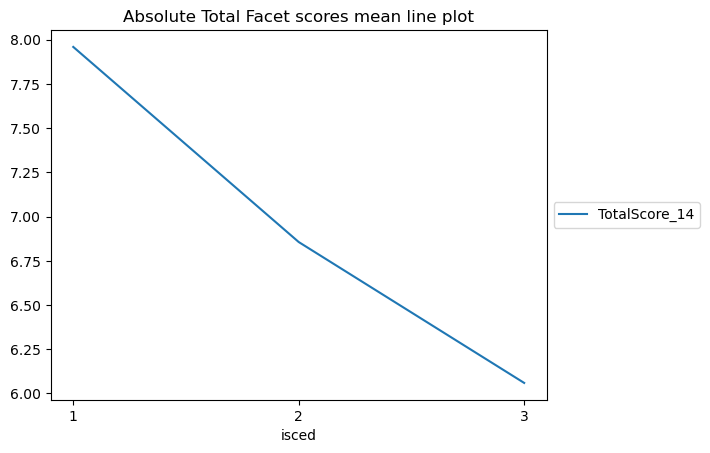

In [67]:
# Absolute Total Facet scores mean line plot from low to high education

df5.groupby('isced')[['TotalScore_14']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

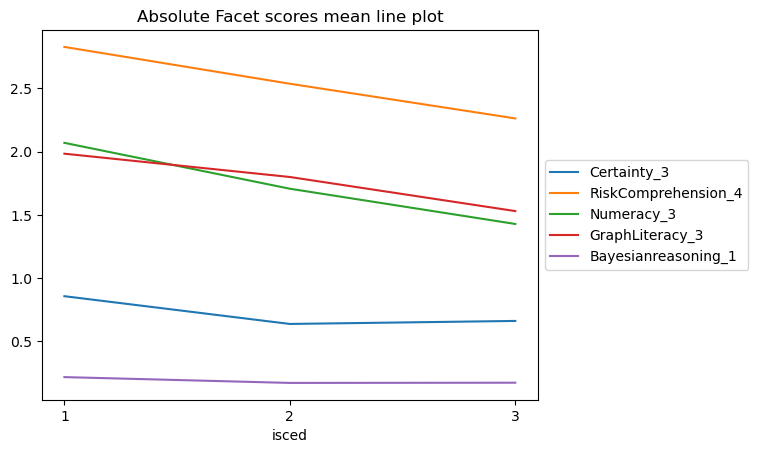

In [68]:
# Absolute Facet scores mean line plot from low to high edu

df5.groupby('isced')[['Certainty_3','RiskComprehension_4','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

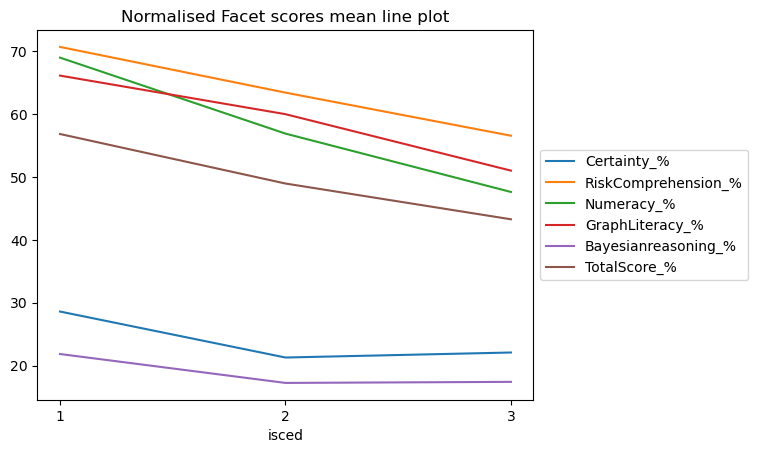

In [69]:
# Normalised Facet scores mean line plot from low to high edu


df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

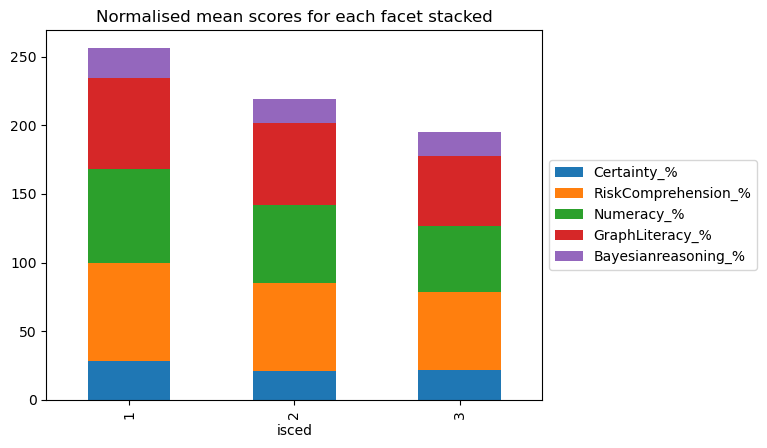

In [70]:
# Normalised mean scores for each facet stacked

df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

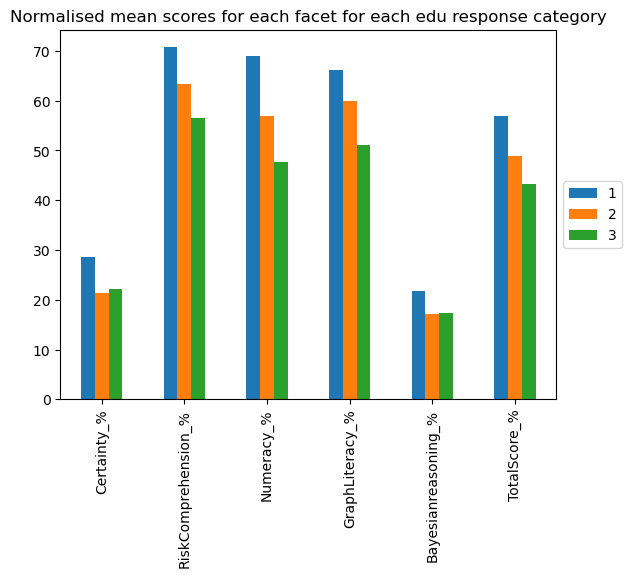

In [71]:
# Normalised mean scores for each facet for each edu response category

df5.groupby('isced')[['Certainty_%','RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each edu response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='isced', ylabel='TotalScore_14'>

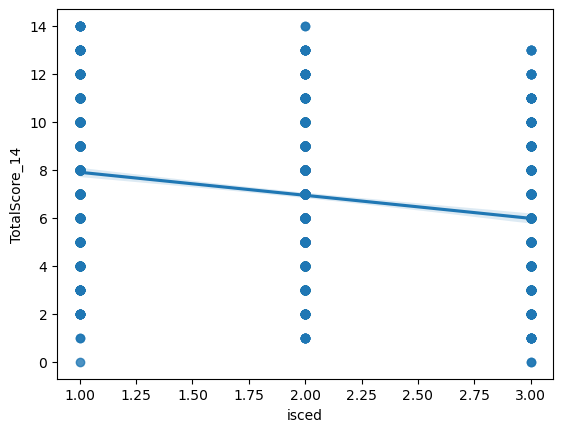

In [72]:
# Trend line for Absolute Total Facet Score vs edu (isced) reponses

sns.regplot (data = df5, x = 'isced', y = 'TotalScore_14')

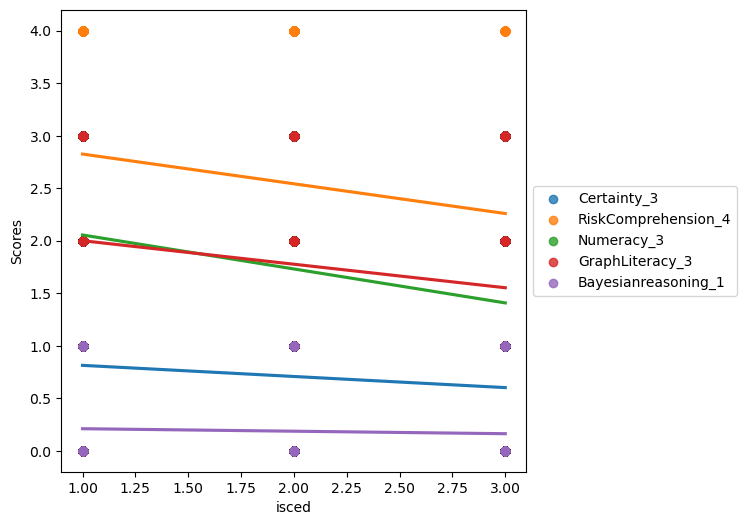

In [73]:
# Trend line for Absolute Independent Facet Score vs edu (isced) reponses

fig, ax6 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df5, x = 'isced', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax6, label='Certainty_3')
sns.regplot (data = df5, x = 'isced', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax6, label='RiskComprehension_4')
sns.regplot (data = df5, x = 'isced', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax6, label='Numeracy_3')
sns.regplot (data = df5, x = 'isced', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax6, label='GraphLiteracy_3')
sns.regplot (data = df5, x = 'isced', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax6, label='Bayesianreasoning_1' )

ax6.set(ylabel='Scores', xlabel='isced')
ax6.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='isced', ylabel='TotalScore_14'>

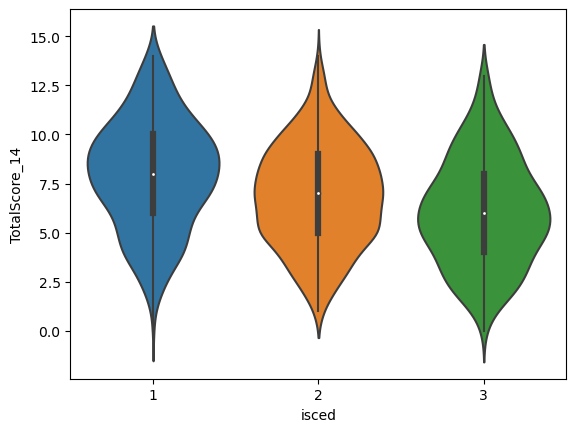

In [74]:
# Violine Plot for TotalScore_14 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'TotalScore_14')

<Axes: xlabel='isced', ylabel='Certainty_3'>

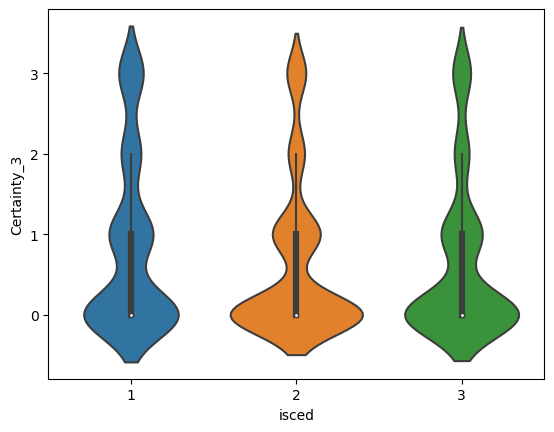

In [75]:
# Violine Plot for Certainty_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Certainty_3')

<Axes: xlabel='isced', ylabel='RiskComprehension_4'>

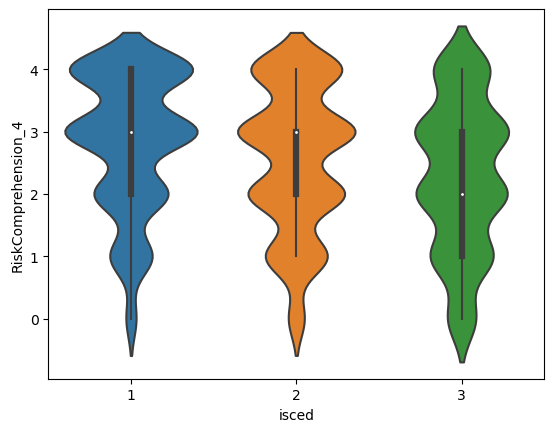

In [76]:
# Violine Plot for RiskComprehension_4 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'RiskComprehension_4')

<Axes: xlabel='isced', ylabel='GraphLiteracy_3'>

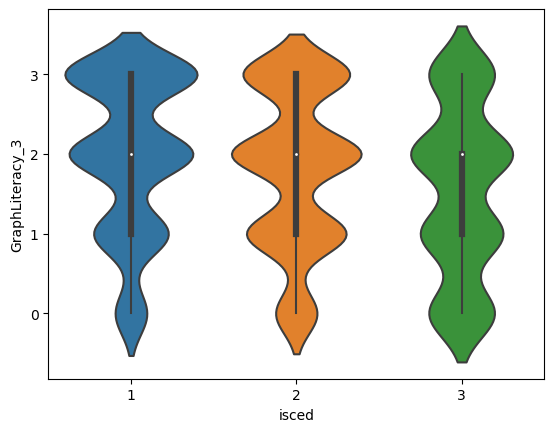

In [77]:
# Violine Plot for GraphLiteracy_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'GraphLiteracy_3')

<Axes: xlabel='isced', ylabel='Numeracy_3'>

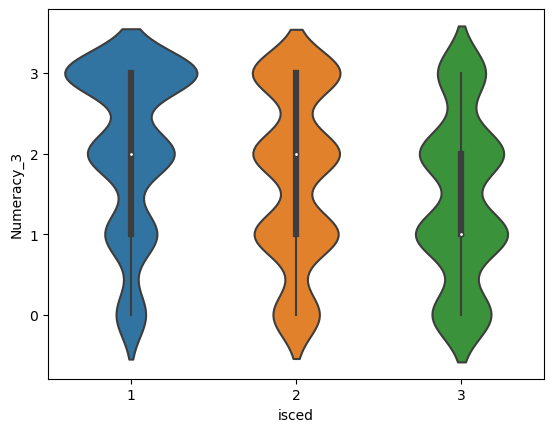

In [78]:
# Violine Plot for Numeracy_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Numeracy_3')

<Axes: xlabel='isced', ylabel='Bayesianreasoning_1'>

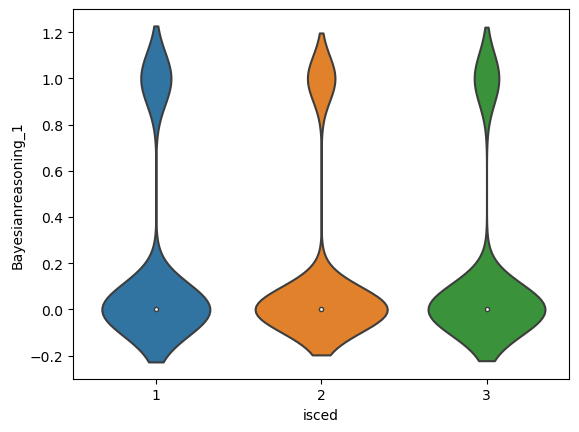

In [79]:
# Violine Plot for TotalScore_14 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Bayesianreasoning_1')

In [80]:
# Descriptive stats for the data set, isced = 1
# NA values of wealth are removed

df6 = df5.dropna(axis = 0, subset = 'wealth')
# df6.drop(df6[df6['wealth'] == 3500000].index, inplace = True)
df6.loc[df6['isced']==1][['wealth']].describe()

wealth
count  3.960000e+02
mean   3.082737e+05
std    6.153044e+05
min    0.000000e+00
25%    1.000000e+04
50%    8.750000e+04
75%    3.500000e+05
max    5.000000e+06

In [81]:
# Descriptive stats for the data set, isced = 2

df6.loc[df6['isced']==2][['wealth']].describe()

wealth
count  4.770000e+02
mean   2.372361e+05
std    5.316798e+05
min    0.000000e+00
25%    3.500000e+03
50%    5.000000e+04
75%    2.200000e+05
max    5.000000e+06

In [82]:
# Descriptive stats for the data set, isced = 3

df6.loc[df6['isced']==3][['wealth']].describe()

wealth
count  2.490000e+02
mean   1.428251e+05
std    5.596193e+05
min    0.000000e+00
25%    3.500000e+02
50%    5.000000e+03
75%    6.000000e+04
max    5.000000e+06

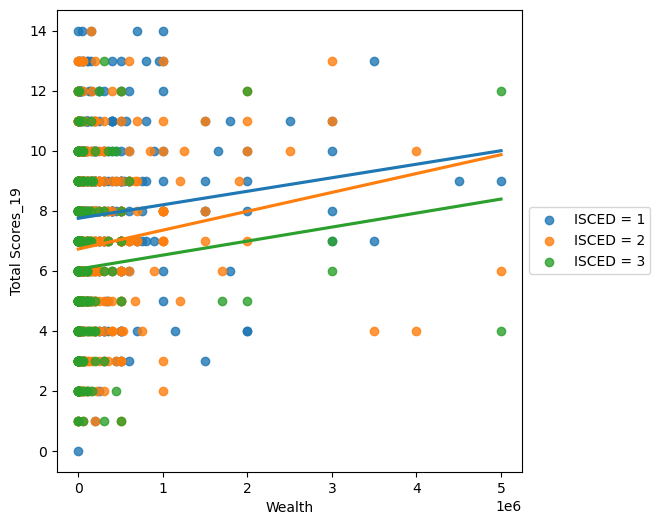

In [83]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='Wealth')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

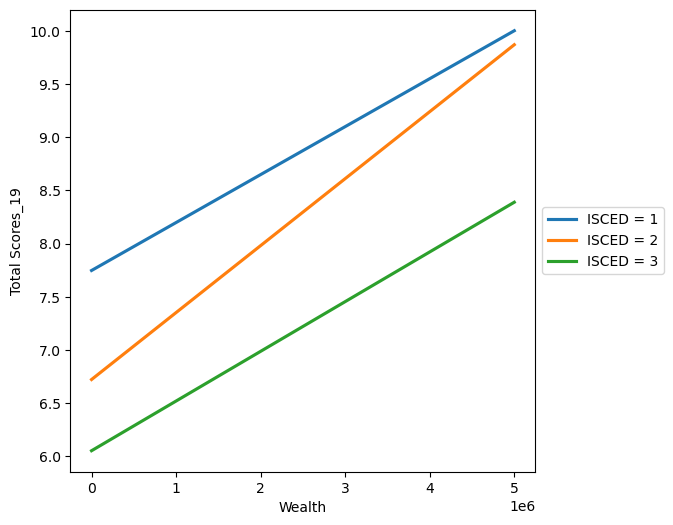

In [84]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='Wealth')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

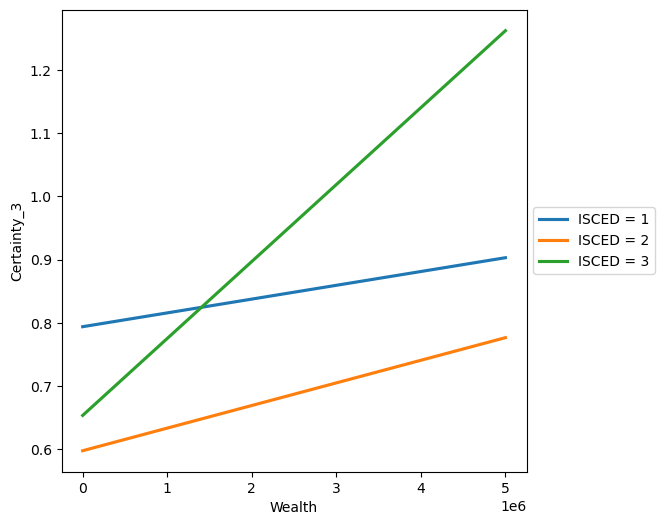

In [85]:
# Trend line for Absolute Certainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_3', xlabel='Wealth')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

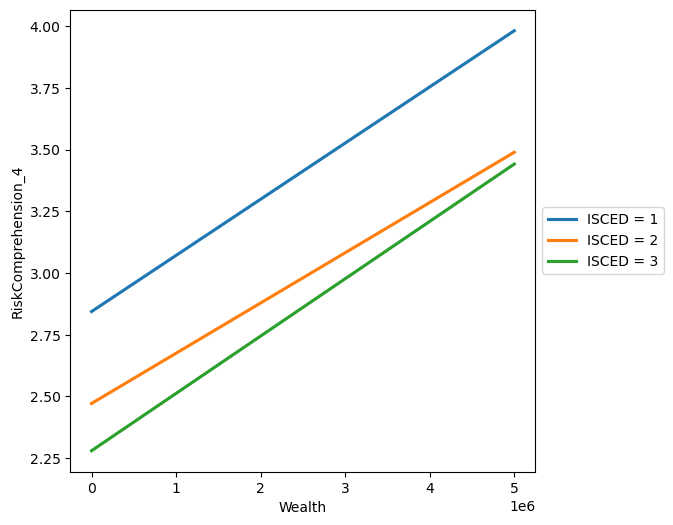

In [86]:
# Trend line for Absolute Uncertainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_4', xlabel='Wealth')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

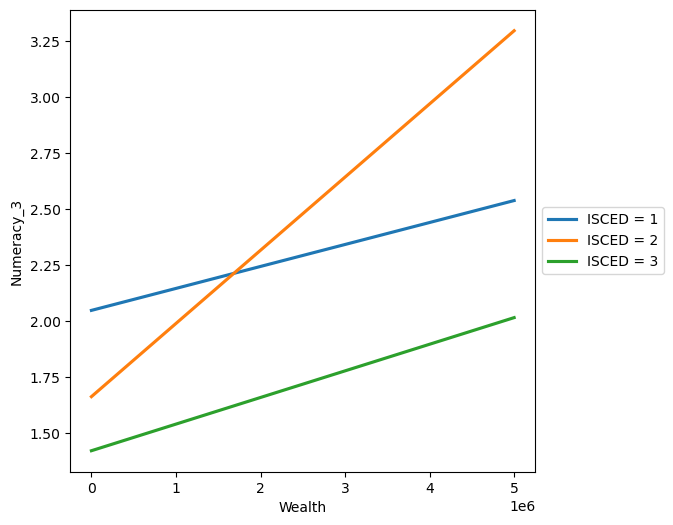

In [87]:
# Trend line for Absolute Number Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

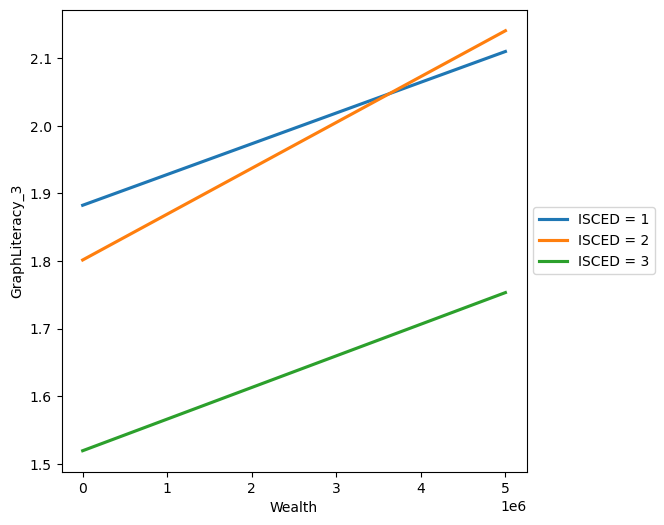

In [88]:
# Trend line for Absolute Graph Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

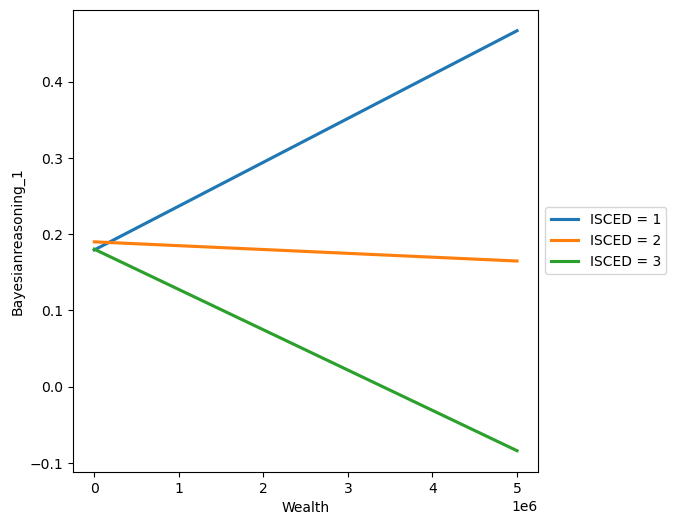

In [89]:
# Trend line for Absolute Bayesian Reasoning Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='Wealth')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [90]:
# Descriptive stats for the data set, isced = 1
# NA values of income are removed

df7 = df5
df7.drop(df7[df7['income'] == 7].index, inplace = True)

df7.loc[df7['isced']==1].describe()

responseid         age     age_rec  isced      income        wealth  \
count    563.000000  563.000000  563.000000  563.0  563.000000  3.890000e+02   
mean    5965.904085   44.307282    2.825933    1.0    3.454707  3.099350e+05   
std     3904.222748   14.453745    0.719506    0.0    1.677566  6.198550e+05   
min        5.000000   18.000000    2.000000    1.0    1.000000  0.000000e+00   
25%     2413.000000   32.000000    2.000000    1.0    2.000000  1.000000e+04   
50%     5869.000000   42.000000    3.000000    1.0    3.000000  8.500000e+04   
75%     9093.000000   57.000000    3.000000    1.0    5.000000  3.500000e+05   
max    15573.000000   75.000000    4.000000    1.0    6.000000  5.000000e+06   

       Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
count   563.000000           563.000000       563.000000  563.000000   
mean      0.841918             2.833037         1.966252    2.069272   
std       1.061231             1.093743         0.964087    1.007356   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             2.000000         1.000000    1.000000   
50%       0.000000             3.000000         2.000000    2.000000   
75%       1.000000             4.000000         3.000000    3.000000   
max       3.000000             4.000000         3.000000    3.000000   

       Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
count           563.000000   563.000000           563.000000       563.000000   
mean              0.214920    28.063943            70.825933        65.541741   
std               0.411132    35.374367            27.343568        32.136239   
min               0.000000     0.000000             0.000000         0.000000   
25%               0.000000     0.000000            50.000000        33.333333   
50%               0.000000     0.000000            75.000000        66.666667   
75%               0.000000    33.333333           100.000000       100.000000   
max               1.000000   100.000000           100.000000       100.000000   

       Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count  563.000000           563.000000     563.000000    563.000000  
mean    68.975725            21.492007       7.925400     56.609997  
std     33.578529            41.113217       2.798979     19.992706  
min      0.000000             0.000000       0.000000      0.000000  
25%     33.333333             0.000000       6.000000     42.857143  
50%     66.666667             0.000000       8.000000     57.142857  
75%    100.000000             0.000000      10.000000     71.428571  
max    100.000000           100.000000      14.000000    100.000000

In [91]:
df7.loc[df7['isced']==2].describe()

responseid        age     age_rec  isced      income        wealth  \
count    733.000000  733.00000  733.000000  733.0  733.000000  4.680000e+02   
mean    5960.547067   47.52251    3.012278    2.0    2.710778  2.389636e+05   
std     4274.006749   15.05767    0.721347    0.0    1.514360  5.361378e+05   
min       15.000000   18.00000    2.000000    2.0    1.000000  0.000000e+00   
25%     1618.000000   35.00000    2.000000    2.0    1.000000  3.375000e+03   
50%     6003.000000   49.00000    3.000000    2.0    2.000000  5.000000e+04   
75%     9364.000000   60.00000    4.000000    2.0    4.000000  2.275000e+05   
max    14419.000000   75.00000    4.000000    2.0    6.000000  5.000000e+06   

       Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
count   733.000000           733.000000       733.000000  733.000000   
mean      0.631651             2.557981         1.817190    1.702592   
std       0.958529             1.137288         0.960635    1.052687   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             2.000000         1.000000    1.000000   
50%       0.000000             3.000000         2.000000    2.000000   
75%       1.000000             3.000000         3.000000    3.000000   
max       3.000000             4.000000         3.000000    3.000000   

       Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
count           733.000000   733.000000           733.000000       733.000000   
mean              0.180082    21.055025            63.949523        60.572988   
std               0.384518    31.950974            28.432192        32.021154   
min               0.000000     0.000000             0.000000         0.000000   
25%               0.000000     0.000000            50.000000        33.333333   
50%               0.000000     0.000000            75.000000        66.666667   
75%               0.000000    33.333333            75.000000       100.000000   
max               1.000000   100.000000           100.000000       100.000000   

       Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count  733.000000           733.000000     733.000000    733.000000  
mean    56.753070            18.008186       6.889495     49.210680  
std     35.089552            38.451800       2.564482     18.317731  
min      0.000000             0.000000       1.000000      7.142857  
25%     33.333333             0.000000       5.000000     35.714286  
50%     66.666667             0.000000       7.000000     50.000000  
75%    100.000000             0.000000       9.000000     64.285714  
max    100.000000           100.000000      14.000000    100.000000

In [92]:
df7.loc[df7['isced']==3].describe()

responseid         age     age_rec  isced      income        wealth  \
count    404.000000  404.000000  404.000000  404.0  404.000000  2.470000e+02   
mean    3369.396040   50.579208    3.158416    3.0    2.237624  1.439812e+05   
std     3465.118524   15.985296    0.745310    0.0    1.322818  5.617409e+05   
min       12.000000   18.000000    2.000000    3.0    1.000000  0.000000e+00   
25%      906.500000   39.750000    3.000000    3.0    1.000000  4.000000e+02   
50%     1903.000000   54.000000    3.000000    3.0    2.000000  5.000000e+03   
75%     5277.750000   63.000000    4.000000    3.0    3.000000  6.000000e+04   
max    15636.000000   75.000000    4.000000    3.0    6.000000  5.000000e+06   

       Certainty_3  RiskComprehension_4  GraphLiteracy_3  Numeracy_3  \
count   404.000000           404.000000       404.000000  404.000000   
mean      0.670792             2.274752         1.547030    1.448020   
std       0.977686             1.191890         1.028268    0.988656   
min       0.000000             0.000000         0.000000    0.000000   
25%       0.000000             1.000000         1.000000    1.000000   
50%       0.000000             2.000000         2.000000    1.000000   
75%       1.000000             3.000000         2.000000    2.000000   
max       3.000000             4.000000         3.000000    3.000000   

       Bayesianreasoning_1  Certainty_%  RiskComprehension_%  GraphLiteracy_%  \
count           404.000000   404.000000           404.000000       404.000000   
mean              0.165842    22.359736            56.868812        51.567657   
std               0.372400    32.589524            29.797249        34.275616   
min               0.000000     0.000000             0.000000         0.000000   
25%               0.000000     0.000000            25.000000        33.333333   
50%               0.000000     0.000000            50.000000        66.666667   
75%               0.000000    33.333333            75.000000        66.666667   
max               1.000000   100.000000           100.000000       100.000000   

       Numeracy_%  Bayesianreasoning_%  TotalScore_14  TotalScore_%  
count  404.000000           404.000000     404.000000    404.000000  
mean    48.267327            16.584158       6.106436     43.617397  
std     32.955192            37.239955       2.665105     19.036468  
min      0.000000             0.000000       0.000000      0.000000  
25%     33.333333             0.000000       4.000000     28.571429  
50%     33.333333             0.000000       6.000000     42.857143  
75%     66.666667             0.000000       8.000000     57.142857  
max    100.000000           100.000000      13.000000     92.857143

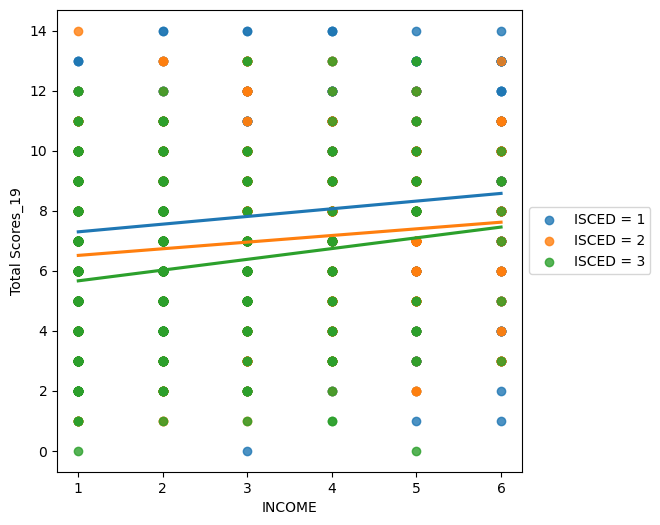

In [93]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==1]['TotalScore_14'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==2]['TotalScore_14'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==3]['TotalScore_14'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='INCOME')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

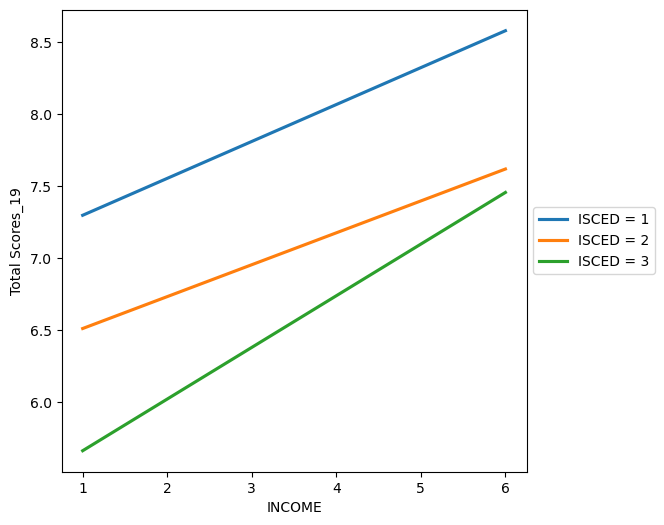

In [94]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'TotalScore_14', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='INCOME')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

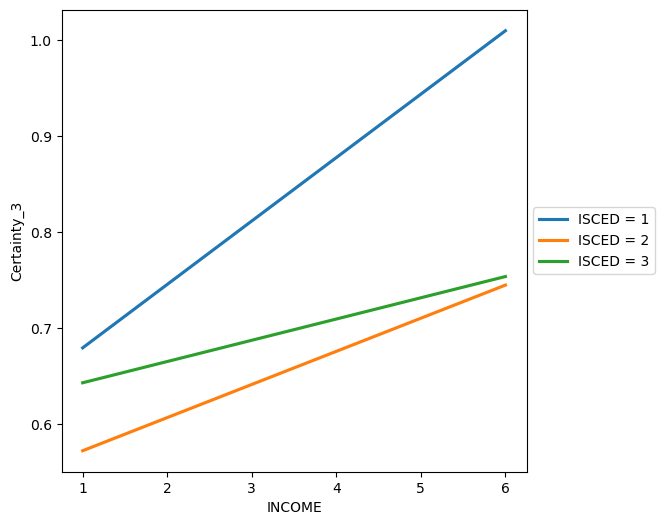

In [95]:
# Trend line for Absolute Certainty Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Certainty_3', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_3', xlabel='INCOME')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

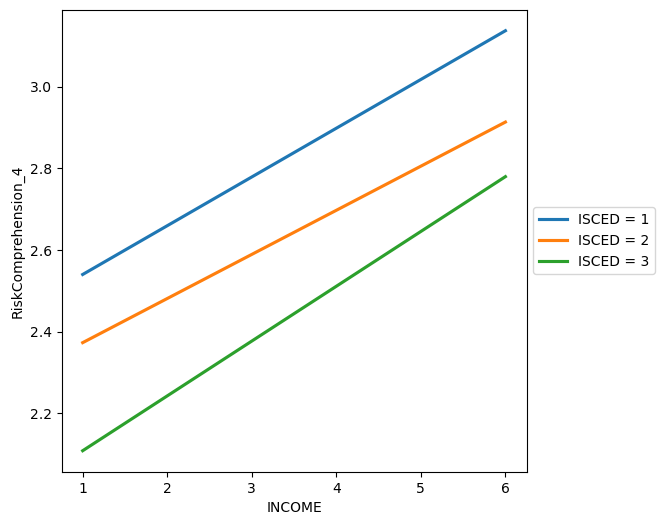

In [96]:
# Trend line for Absolute Risk Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'RiskComprehension_4', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_4', xlabel='INCOME')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

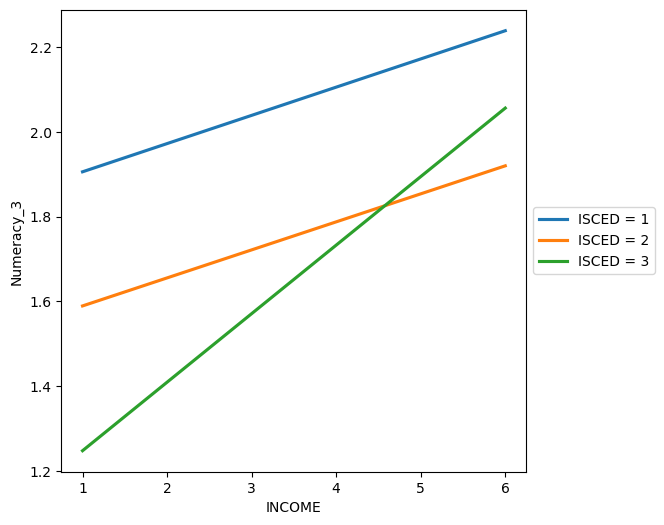

In [97]:
# Trend line for Absolute Number Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

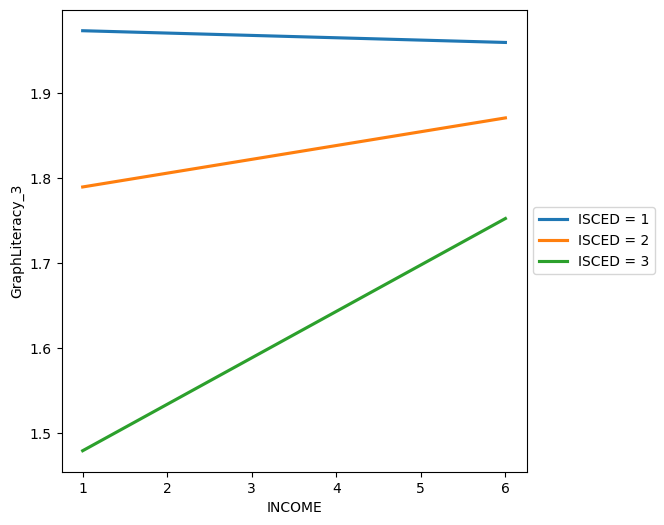

In [98]:
# Trend line for Absolute Graph Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

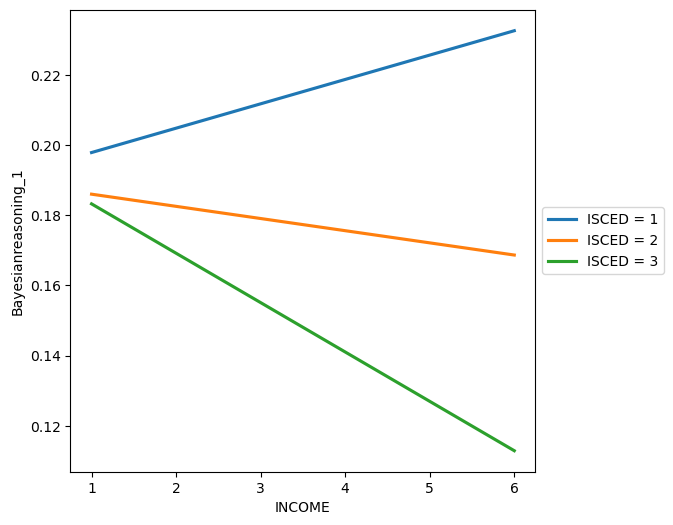

In [99]:
# Trend line for Absolute Bayesian Reasoning Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='INCOME')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [100]:
df7

responseid  age  age_rec  isced  income    wealth  Certainty_3  \
0          10237   42        3      1       6   50000.0            1   
1             32   31        2      1       2       NaN            2   
2           5234   28        2      1       2       NaN            0   
3            118   33        2      1       1  120000.0            0   
4           2842   26        2      1       3  200000.0            0   
...          ...  ...      ...    ...     ...       ...          ...   
1948        1456   36        3      3       1       NaN            2   
1949        2846   47        3      3       2  200000.0            0   
1950        8284   38        3      3       1  450000.0            0   
1951        8253   50        3      3       1       0.0            0   
1952        2671   73        4      3       3    1200.0            0   

      RiskComprehension_4  GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  \
0                       4                2           3                    0   
1                       4                2           3                    0   
2                       4                2           3                    0   
3                       1                1           0                    0   
4                       3                2           3                    0   
...                   ...              ...         ...                  ...   
1948                    3                2           2                    1   
1949                    3                1           0                    0   
1950                    1                1           0                    0   
1951                    2                1           2                    1   
1952                    2                3           1                    0   

      Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0       33.333333                100.0        66.666667  100.000000   
1       66.666667                100.0        66.666667  100.000000   
2        0.000000                100.0        66.666667  100.000000   
3        0.000000                 25.0        33.333333    0.000000   
4        0.000000                 75.0        66.666667  100.000000   
...           ...                  ...              ...         ...   
1948    66.666667                 75.0        66.666667   66.666667   
1949     0.000000                 75.0        33.333333    0.000000   
1950     0.000000                 25.0        33.333333    0.000000   
1951     0.000000                 50.0        33.333333   66.666667   
1952     0.000000                 50.0       100.000000   33.333333   

      Bayesianreasoning_%  TotalScore_14  TotalScore_%  
0                     0.0             10     71.428571  
1                     0.0             11     78.571429  
2                     0.0              9     64.285714  
3                     0.0              2     14.285714  
4                     0.0              8     57.142857  
...                   ...            ...           ...  
1948                100.0             10     71.428571  
1949                  0.0              4     28.571429  
1950                  0.0              2     14.285714  
1951                100.0              6     42.857143  
1952                  0.0              6     42.857143  

[1700 rows x 18 columns]

In [101]:
# Since we already have a classification for Age groups in the form of age_rec, we will use that.
# We will also use median of age to see if it yields any relevant results, as instructed.

# AXES to be used = Age or age groups, ISCED, Income

# Age groups = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 59 y/o
# Age group 4 = 60 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)



In [102]:
df7.loc[(df7['age_rec']==2)].describe()

responseid         age  age_rec       isced      income  \
count    474.000000  474.000000    474.0  474.000000  474.000000   
mean    6493.943038   27.594937      2.0    1.751055    2.729958   
std     4297.087794    5.150223      0.0    0.739442    1.541144   
min       24.000000   18.000000      2.0    1.000000    1.000000   
25%     2203.500000   23.250000      2.0    1.000000    1.000000   
50%     6407.500000   29.000000      2.0    2.000000    2.000000   
75%     9870.250000   32.000000      2.0    2.000000    4.000000   
max    14155.000000   35.000000      2.0    3.000000    6.000000   

             wealth  Certainty_3  RiskComprehension_4  GraphLiteracy_3  \
count  2.990000e+02   474.000000           474.000000       474.000000   
mean   1.875135e+05     0.907173             2.649789         1.751055   
std    5.651190e+05     1.074316             1.148457         1.036974   
min    0.000000e+00     0.000000             0.000000         0.000000   
25%    1.000000e+03     0.000000             2.000000         1.000000   
50%    2.000000e+04     1.000000             3.000000         2.000000   
75%    1.500000e+05     2.000000             4.000000         3.000000   
max    5.000000e+06     3.000000             4.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  RiskComprehension_%  \
count  474.000000           474.000000   474.000000           474.000000   
mean     1.721519             0.200422    30.239100            66.244726   
std      1.083453             0.400739    35.810545            28.711425   
min      0.000000             0.000000     0.000000             0.000000   
25%      1.000000             0.000000     0.000000            50.000000   
50%      2.000000             0.000000    33.333333            75.000000   
75%      3.000000             0.000000    66.666667           100.000000   
max      3.000000             1.000000   100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_14  \
count       474.000000  474.000000           474.000000     474.000000   
mean         58.368495   57.383966            20.042194       7.229958   
std          34.565815   36.115094            40.073905       2.849997   
min           0.000000    0.000000             0.000000       0.000000   
25%          33.333333   33.333333             0.000000       5.000000   
50%          66.666667   66.666667             0.000000       7.000000   
75%         100.000000  100.000000             0.000000       9.000000   
max         100.000000  100.000000           100.000000      14.000000   

       TotalScore_%  
count    474.000000  
mean      51.642556  
std       20.357122  
min        0.000000  
25%       35.714286  
50%       50.000000  
75%       64.285714  
max      100.000000

In [103]:
df7.loc[(df7['age_rec']==3)].describe()

responseid         age  age_rec       isced      income  \
count    777.000000  777.000000    777.0  777.000000  777.000000   
mean    4701.234234   48.464607      3.0    1.890605    2.989704   
std     3775.089082    7.112251      0.0    0.731914    1.654390   
min        5.000000   36.000000      3.0    1.000000    1.000000   
25%     1086.000000   42.000000      3.0    1.000000    2.000000   
50%     3166.000000   49.000000      3.0    2.000000    3.000000   
75%     8497.000000   55.000000      3.0    2.000000    4.000000   
max    15573.000000   59.000000      3.0    3.000000    6.000000   

             wealth  Certainty_3  RiskComprehension_4  GraphLiteracy_3  \
count  4.970000e+02   777.000000           777.000000       777.000000   
mean   2.408083e+05     0.709138             2.616474         1.846847   
std    5.123195e+05     1.018049             1.139559         0.979674   
min    0.000000e+00     0.000000             0.000000         0.000000   
25%    2.500000e+03     0.000000             2.000000         1.000000   
50%    5.000000e+04     0.000000             3.000000         2.000000   
75%    2.500000e+05     1.000000             4.000000         3.000000   
max    4.500000e+06     3.000000             4.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  RiskComprehension_%  \
count  777.000000           777.000000   777.000000            777.00000   
mean     1.782497             0.175032    23.637924             65.41184   
std      1.041808             0.380239    33.934973             28.48897   
min      0.000000             0.000000     0.000000              0.00000   
25%      1.000000             0.000000     0.000000             50.00000   
50%      2.000000             0.000000     0.000000             75.00000   
75%      3.000000             0.000000    33.333333            100.00000   
max      3.000000             1.000000   100.000000            100.00000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_14  \
count       777.000000  777.000000           777.000000     777.000000   
mean         61.561562   59.416559            17.503218       7.129987   
std          32.655803   34.726924            38.023939       2.774114   
min           0.000000    0.000000             0.000000       1.000000   
25%          33.333333   33.333333             0.000000       5.000000   
50%          66.666667   66.666667             0.000000       7.000000   
75%         100.000000  100.000000             0.000000       9.000000   
max         100.000000  100.000000           100.000000      14.000000   

       TotalScore_%  
count    777.000000  
mean      50.928479  
std       19.815103  
min        7.142857  
25%       35.714286  
50%       50.000000  
75%       64.285714  
max      100.000000

In [104]:
df7.loc[(df7['age_rec']==4)].describe()

responseid         age  age_rec       isced      income  \
count    449.000000  449.000000    449.0  449.000000  449.000000   
mean    5251.966592   65.648107      4.0    2.097996    2.714922   
std     4253.142346    4.150732      0.0    0.746552    1.537848   
min       15.000000   60.000000      4.0    1.000000    1.000000   
25%     1333.000000   62.000000      4.0    2.000000    1.000000   
50%     5256.000000   65.000000      4.0    2.000000    2.000000   
75%     8817.000000   69.000000      4.0    3.000000    4.000000   
max    15636.000000   75.000000      4.0    3.000000    6.000000   

             wealth  Certainty_3  RiskComprehension_4  GraphLiteracy_3  \
count  3.080000e+02   449.000000           449.000000       449.000000   
mean   2.993987e+05     0.505568             2.449889         1.779510   
std    6.701023e+05     0.842822             1.179364         0.955683   
min    0.000000e+00     0.000000             0.000000         0.000000   
25%    5.000000e+03     0.000000             2.000000         1.000000   
50%    5.000000e+04     0.000000             2.000000         2.000000   
75%    3.000000e+05     1.000000             3.000000         3.000000   
max    5.000000e+06     3.000000             4.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  RiskComprehension_%  \
count  449.000000           449.000000   449.000000           449.000000   
mean     1.775056             0.198218    16.852264            61.247216   
std      1.026741             0.399102    28.094056            29.484089   
min      0.000000             0.000000     0.000000             0.000000   
25%      1.000000             0.000000     0.000000            50.000000   
50%      2.000000             0.000000     0.000000            50.000000   
75%      3.000000             0.000000    33.333333            75.000000   
max      3.000000             1.000000   100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_14  \
count       449.000000  449.000000           449.000000     449.000000   
mean         59.317001   59.168523            19.821826       6.708241   
std          31.856087   34.224712            39.910216       2.588944   
min           0.000000    0.000000             0.000000       0.000000   
25%          33.333333   33.333333             0.000000       5.000000   
50%          66.666667   66.666667             0.000000       7.000000   
75%         100.000000  100.000000             0.000000       9.000000   
max         100.000000  100.000000           100.000000      14.000000   

       TotalScore_%  
count    449.000000  
mean      47.916004  
std       18.492460  
min        0.000000  
25%       35.714286  
50%       50.000000  
75%       64.285714  
max      100.000000

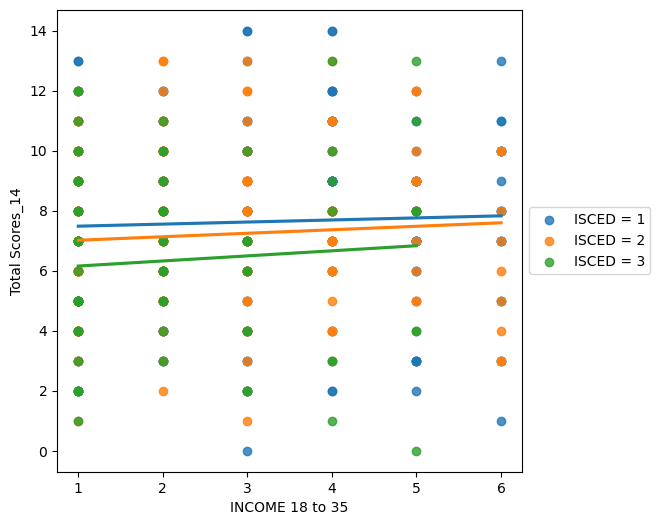

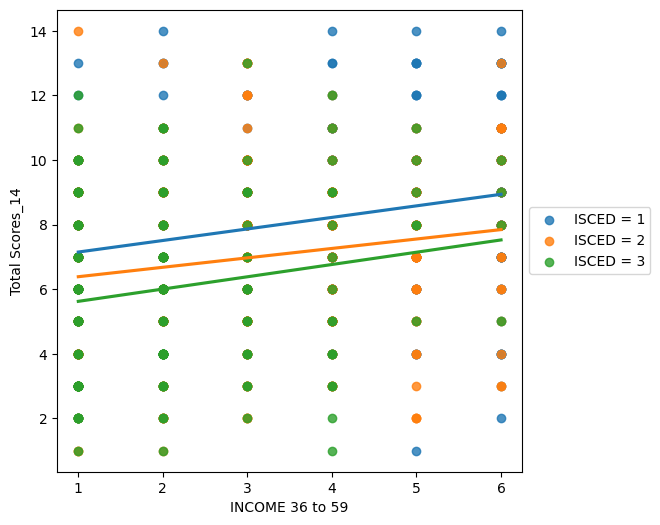

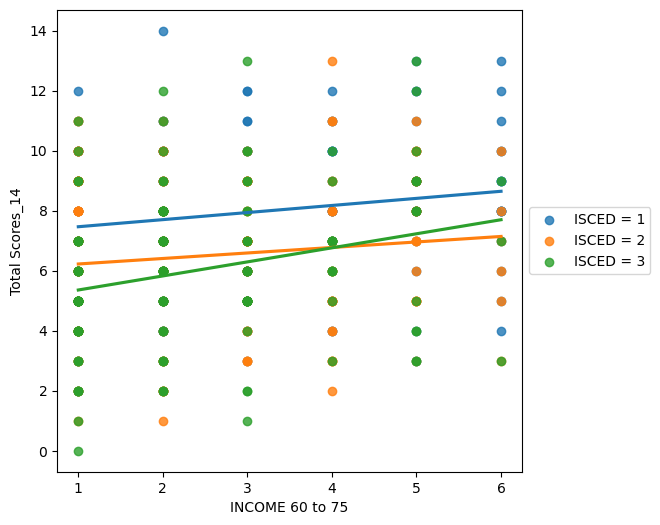

In [105]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_14', xlabel='INCOME 18 to 35')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME 36 to 59')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME 60 to 75')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

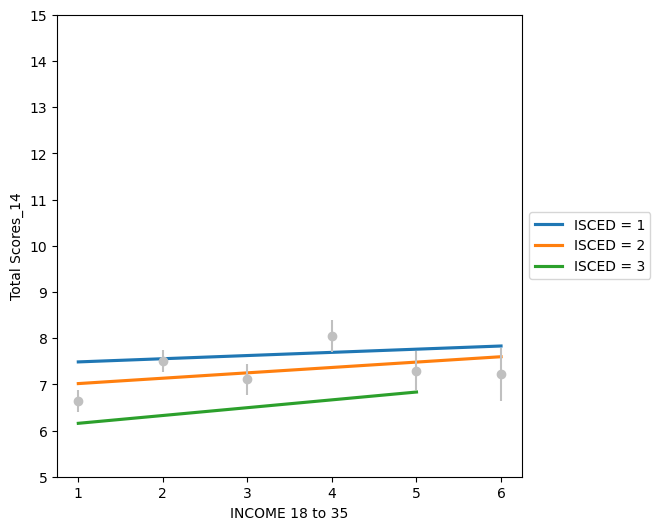

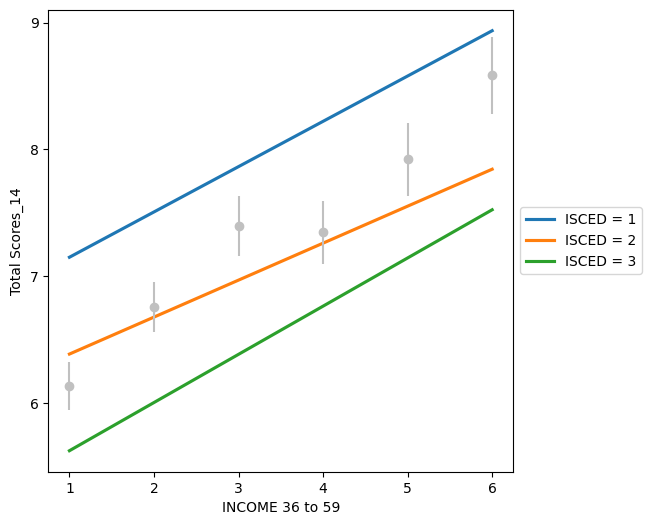

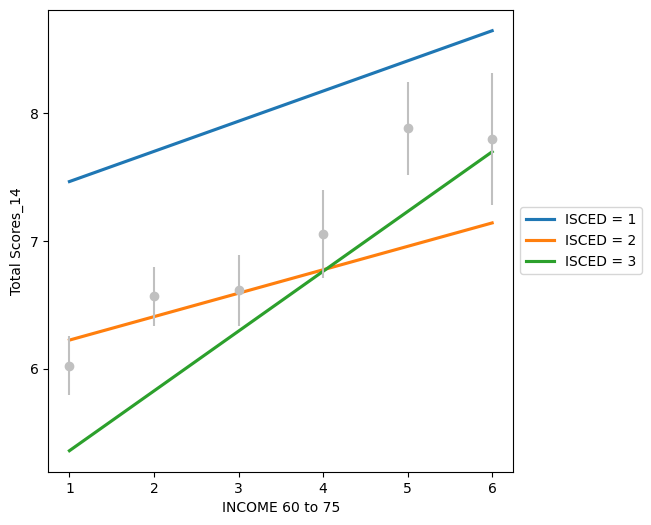

In [106]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean(numeric_only=True)['TotalScore_14'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income']).sem(ddof = 1)['TotalScore_14'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_14', xlabel='INCOME 18 to 35',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME 36 to 59',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean(numeric_only=True)['TotalScore_14'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income']).sem()['TotalScore_14'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME 60 to 75',  yticks = np.arange(5, 16 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean(numeric_only=True)['TotalScore_14'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income']).sem()['TotalScore_14'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

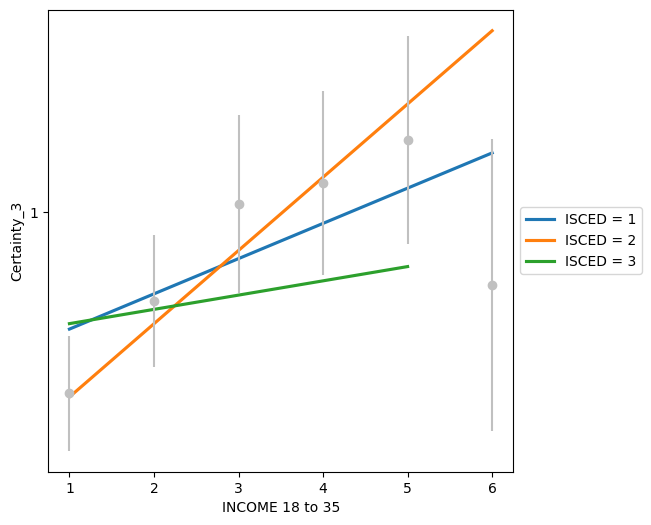

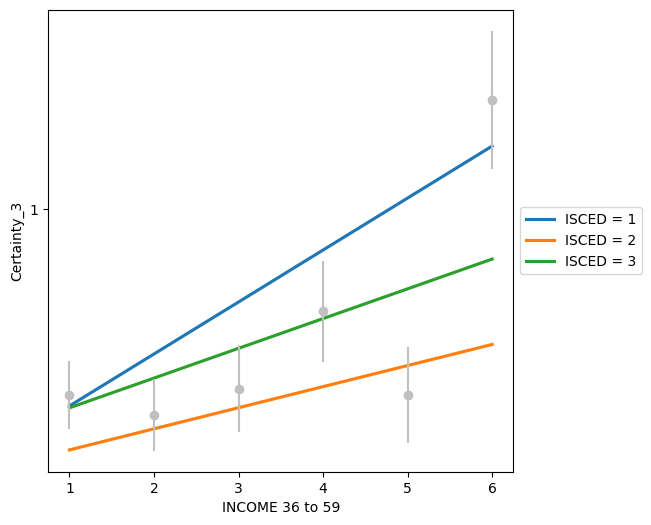

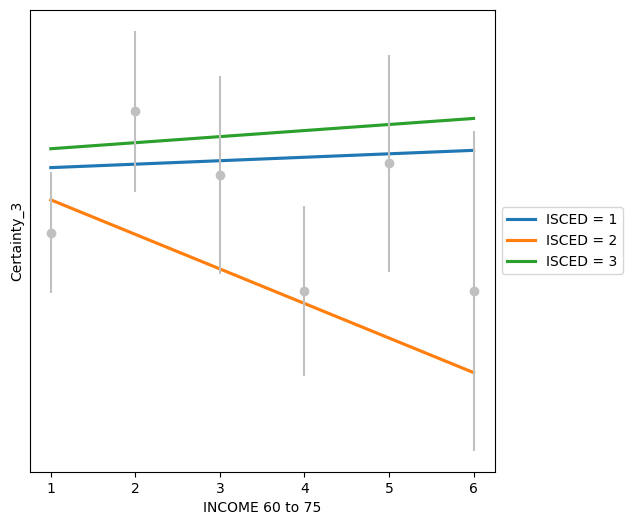

In [107]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Certainty_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean()['Certainty_3'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income']).sem()['Certainty_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Certainty_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean()['Certainty_3'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income']).sem()['Certainty_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Certainty_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean()['Certainty_3'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income']).sem()['Certainty_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

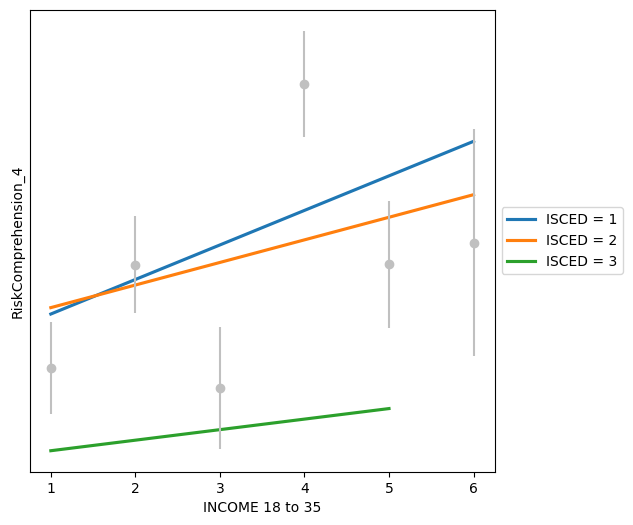

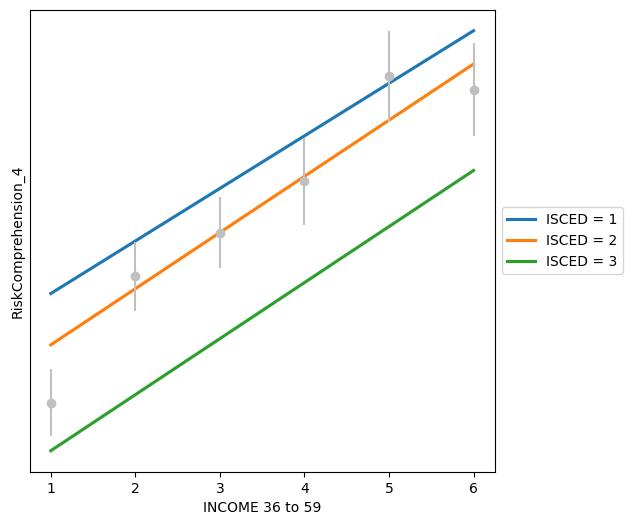

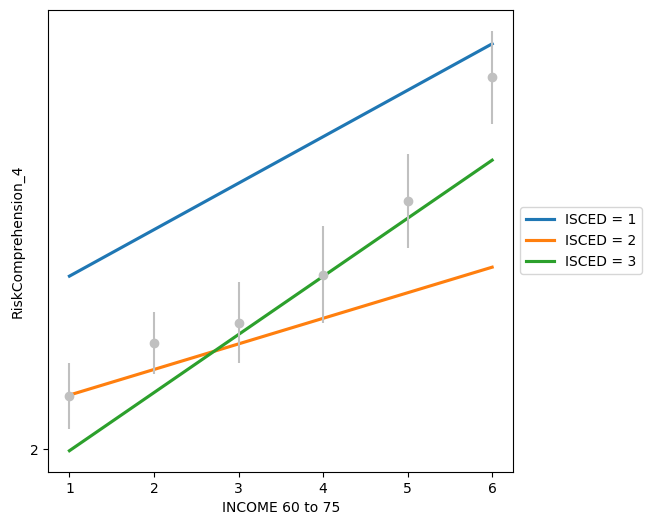

In [108]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='RiskComprehension_4', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean()['RiskComprehension_4'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income']).sem()['RiskComprehension_4'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='RiskComprehension_4', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean()['RiskComprehension_4'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income']).sem()['RiskComprehension_4'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='RiskComprehension_4', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 3 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean()['RiskComprehension_4'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income']).sem()['RiskComprehension_4'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

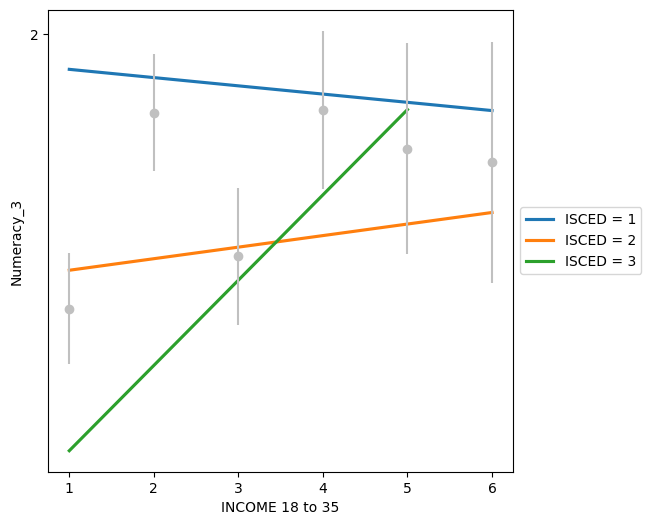

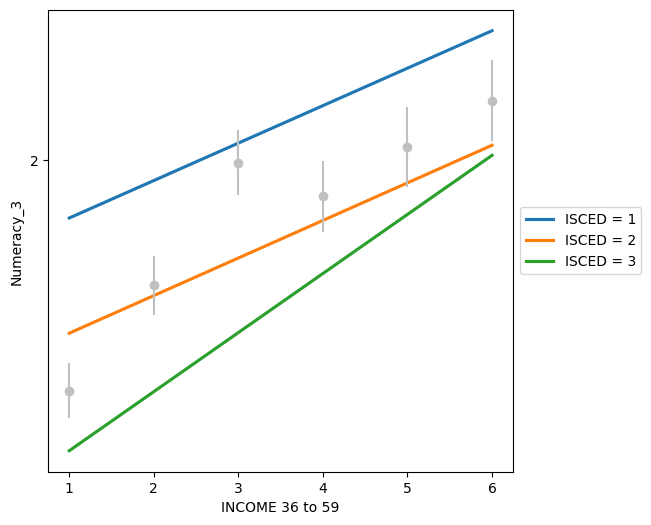

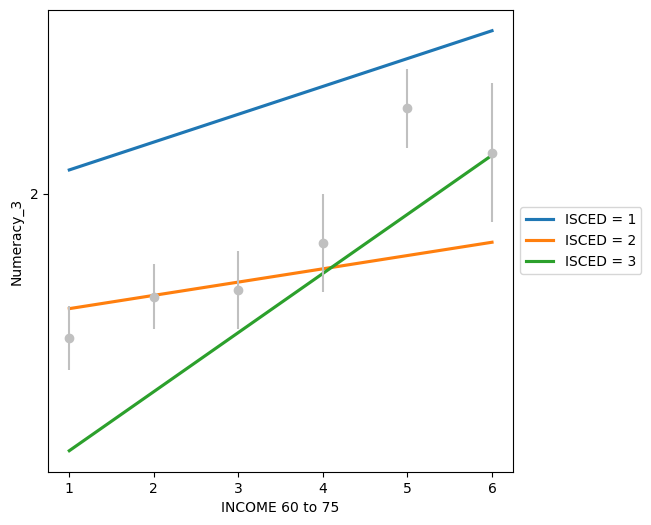

In [109]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Numeracy_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean()['Numeracy_3'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income']).sem()['Numeracy_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Numeracy_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean()['Numeracy_3'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income']).sem()['Numeracy_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Numeracy_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean()['Numeracy_3'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income']).sem()['Numeracy_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

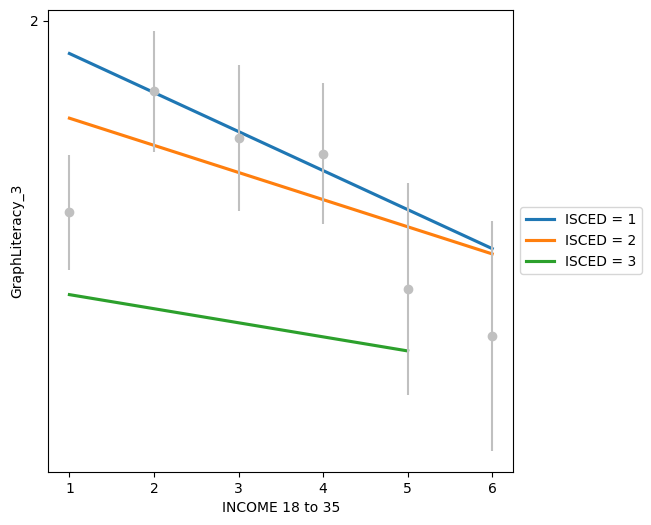

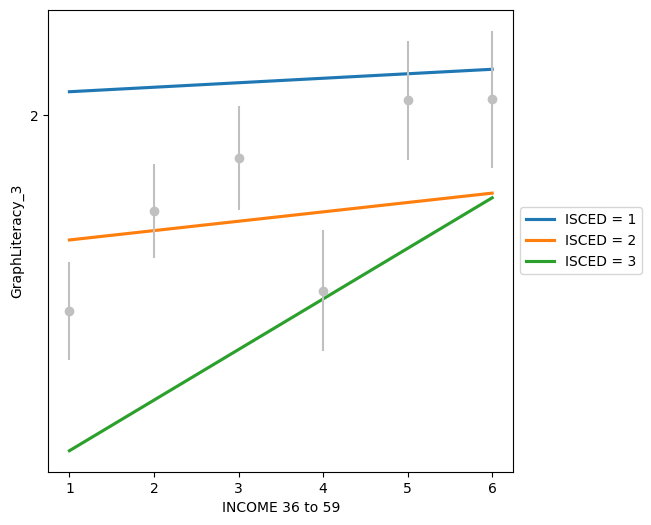

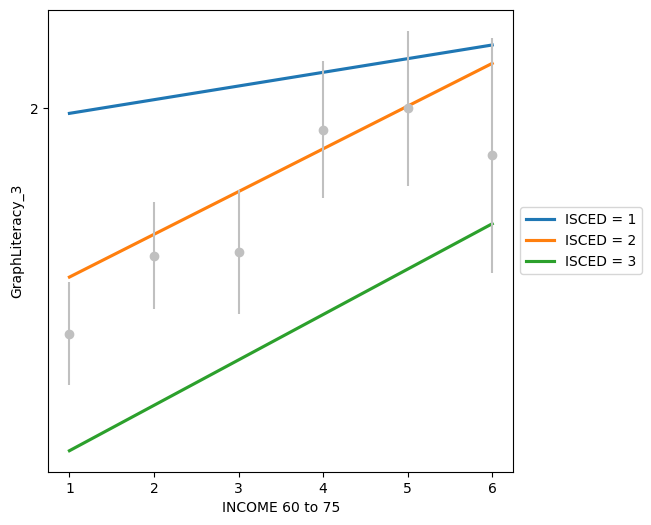

In [110]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean()['GraphLiteracy_3'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income']).sem()['GraphLiteracy_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean()['GraphLiteracy_3'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income']).sem()['GraphLiteracy_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='GraphLiteracy_3', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 4 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean()['GraphLiteracy_3'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income']).sem()['GraphLiteracy_3'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

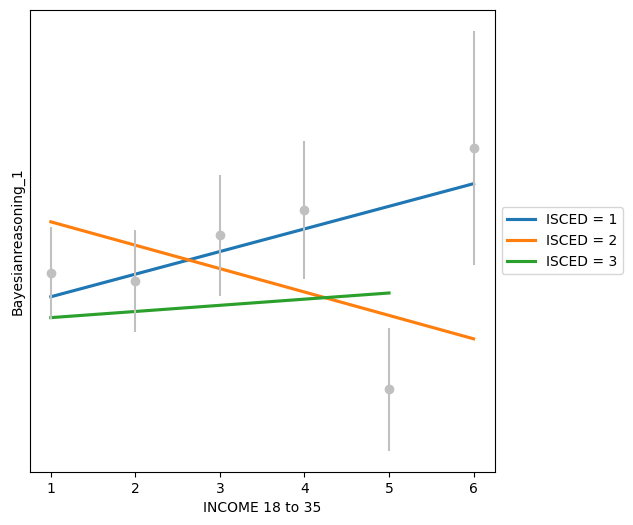

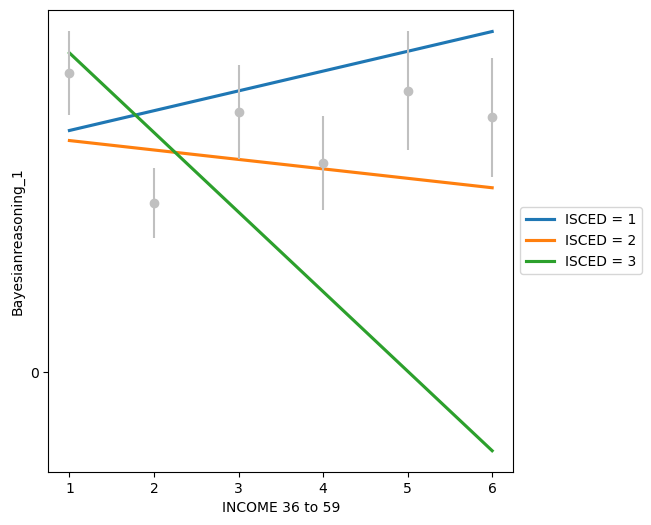

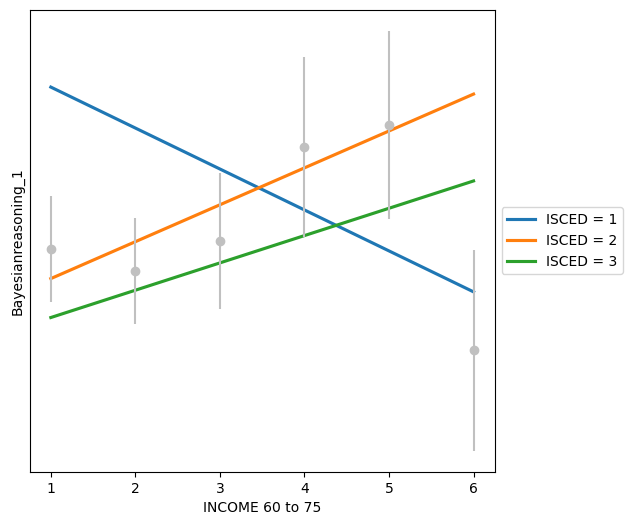

In [111]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME 18 to 35',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean()['Bayesianreasoning_1'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income']).sem()['Bayesianreasoning_1'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME 36 to 59',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean()['Bayesianreasoning_1'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income']).sem()['Bayesianreasoning_1'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Bayesianreasoning_1', xlabel='INCOME 60 to 75',  yticks = np.arange(0, 5 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean()['Bayesianreasoning_1'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income']).sem()['Bayesianreasoning_1'], fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [112]:
# Age median method
# Age_median
age_m = df7['age'].median()
age_m

48.0

In [113]:
df7.loc[(df7['age'] < age_m)].describe()

responseid         age     age_rec       isced      income  \
count    819.000000  819.000000  819.000000  819.000000  819.000000   
mean    5794.545788   33.468864    2.421245    1.764347    2.848596   
std     4131.602460    8.223049    0.494060    0.731344    1.593548   
min        9.000000   18.000000    2.000000    1.000000    1.000000   
25%     1735.500000   27.500000    2.000000    1.000000    1.000000   
50%     5766.000000   34.000000    2.000000    2.000000    3.000000   
75%     9413.500000   40.000000    3.000000    2.000000    4.000000   
max    14155.000000   47.000000    3.000000    3.000000    6.000000   

             wealth  Certainty_3  RiskComprehension_4  GraphLiteracy_3  \
count  5.150000e+02   819.000000           819.000000       819.000000   
mean   1.899709e+05     0.865690             2.654457         1.804640   
std    4.842720e+05     1.084017             1.133622         1.024601   
min    0.000000e+00     0.000000             0.000000         0.000000   
25%    1.000000e+03     0.000000             2.000000         1.000000   
50%    3.000000e+04     0.000000             3.000000         2.000000   
75%    1.800000e+05     1.000000             4.000000         3.000000   
max    5.000000e+06     3.000000             4.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  RiskComprehension_%  \
count  819.000000           819.000000   819.000000           819.000000   
mean     1.778999             0.192918    28.856329            66.361416   
std      1.063393             0.394830    36.133899            28.340555   
min      0.000000             0.000000     0.000000             0.000000   
25%      1.000000             0.000000     0.000000            50.000000   
50%      2.000000             0.000000     0.000000            75.000000   
75%      3.000000             0.000000    33.333333           100.000000   
max      3.000000             1.000000   100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_14  \
count       819.000000  819.000000           819.000000     819.000000   
mean         60.154660   59.299959            19.291819       7.296703   
std          34.153368   35.446444            39.483048       2.833803   
min           0.000000    0.000000             0.000000       0.000000   
25%          33.333333   33.333333             0.000000       5.000000   
50%          66.666667   66.666667             0.000000       7.000000   
75%         100.000000  100.000000             0.000000       9.000000   
max         100.000000  100.000000           100.000000      14.000000   

       TotalScore_%  
count    819.000000  
mean      52.119309  
std       20.241453  
min        0.000000  
25%       35.714286  
50%       50.000000  
75%       64.285714  
max      100.000000

In [114]:
df7.loc[(df7['age'] > age_m)].describe()

responseid         age     age_rec       isced      income  \
count    845.000000  845.000000  845.000000  845.000000  845.000000   
mean    4952.375148   60.442604    3.531361    2.037870    2.837870   
std     4068.956618    6.693923    0.499311    0.738889    1.597832   
min        5.000000   49.000000    3.000000    1.000000    1.000000   
25%     1163.000000   55.000000    3.000000    1.000000    1.000000   
50%     3052.000000   60.000000    4.000000    2.000000    3.000000   
75%     8620.000000   65.000000    4.000000    3.000000    4.000000   
max    15636.000000   75.000000    4.000000    3.000000    6.000000   

             wealth  Certainty_3  RiskComprehension_4  GraphLiteracy_3  \
count  5.660000e+02   845.000000           845.000000       845.000000   
mean   2.856130e+05     0.556213             2.512426         1.804734   
std    6.408081e+05     0.886029             1.165824         0.961819   
min    0.000000e+00     0.000000             0.000000         0.000000   
25%    4.000000e+03     0.000000             2.000000         1.000000   
50%    5.000000e+04     0.000000             3.000000         2.000000   
75%    3.000000e+05     1.000000             3.000000         3.000000   
max    5.000000e+06     3.000000             4.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  RiskComprehension_%  \
count  845.000000           845.000000   845.000000           845.000000   
mean     1.742012             0.188166    18.540434            62.810651   
std      1.035941             0.391076    29.534297            29.145608   
min      0.000000             0.000000     0.000000             0.000000   
25%      1.000000             0.000000     0.000000            50.000000   
50%      2.000000             0.000000     0.000000            75.000000   
75%      3.000000             0.000000    33.333333            75.000000   
max      3.000000             1.000000   100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_14  \
count       845.000000  845.000000           845.000000     845.000000   
mean         60.157791   58.067061            18.816568       6.803550   
std          32.060638   34.531365            39.107589       2.667469   
min           0.000000    0.000000             0.000000       0.000000   
25%          33.333333   33.333333             0.000000       5.000000   
50%          66.666667   66.666667             0.000000       7.000000   
75%         100.000000  100.000000             0.000000       9.000000   
max         100.000000  100.000000           100.000000      14.000000   

       TotalScore_%  
count    845.000000  
mean      48.596788  
std       19.053349  
min        0.000000  
25%       35.714286  
50%       50.000000  
75%       64.285714  
max      100.000000

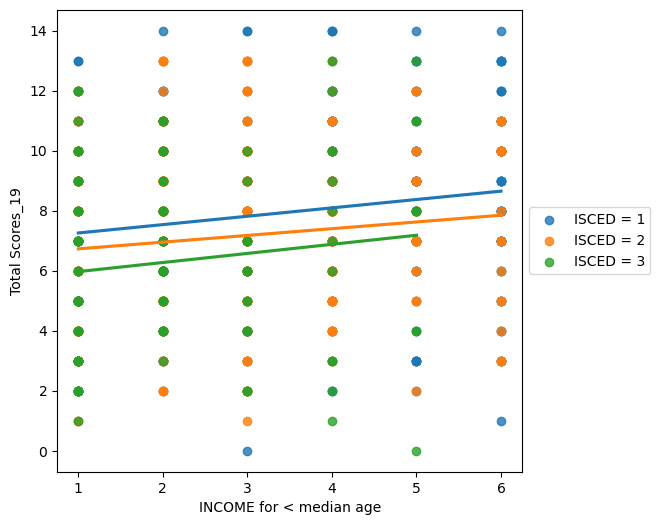

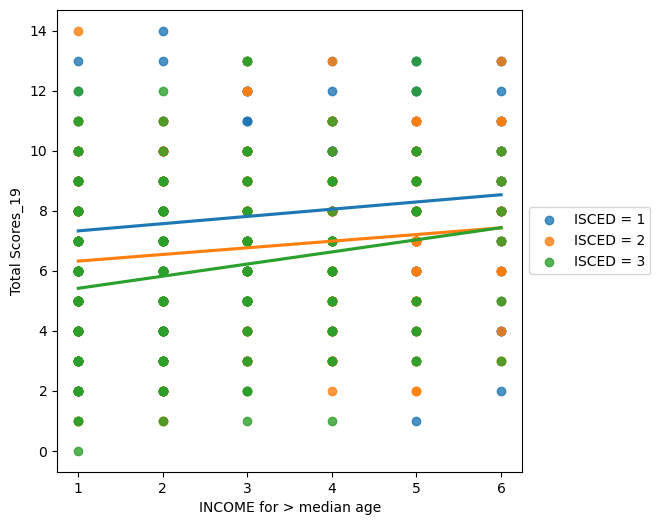

In [115]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='INCOME for > median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

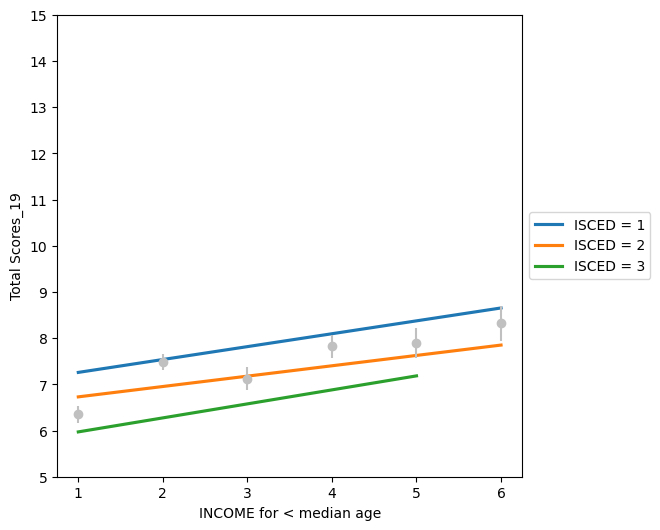

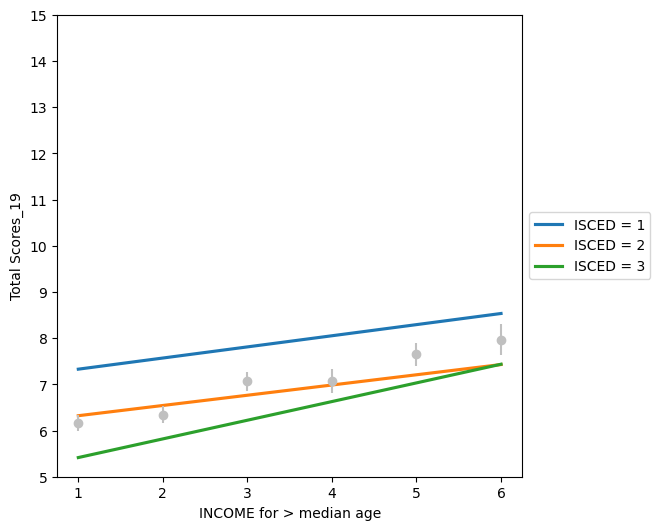

In [116]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income']).mean()['TotalScore_14'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income']).sem()['TotalScore_14'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['TotalScore_14'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income']).mean()['TotalScore_14'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income']).sem()['TotalScore_14'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Total Scores_19', xlabel='INCOME for > median age',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

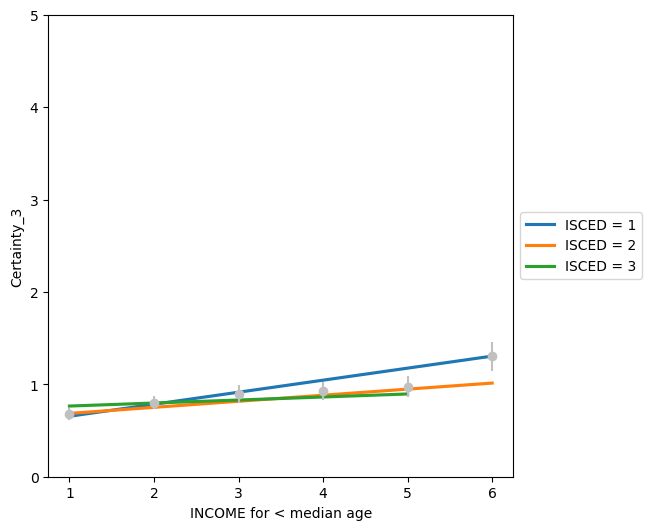

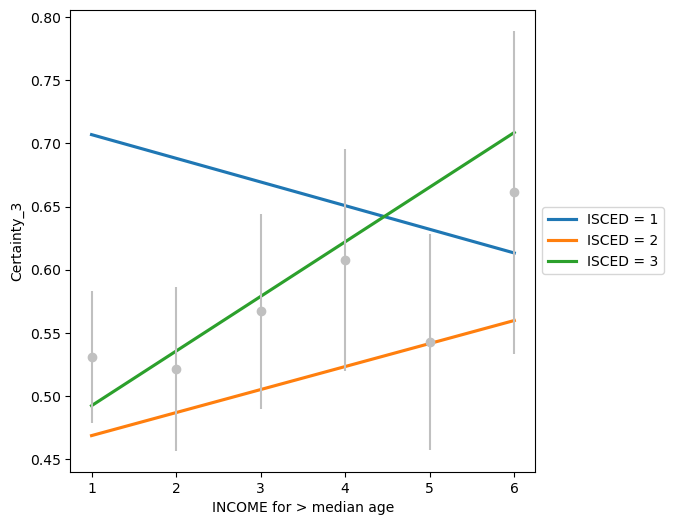

In [117]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income']).mean()['Certainty_3'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income']).sem()['Certainty_3'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Certainty_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Certainty_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income']).mean()['Certainty_3'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income']).sem()['Certainty_3'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Certainty_3', xlabel='INCOME for > median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

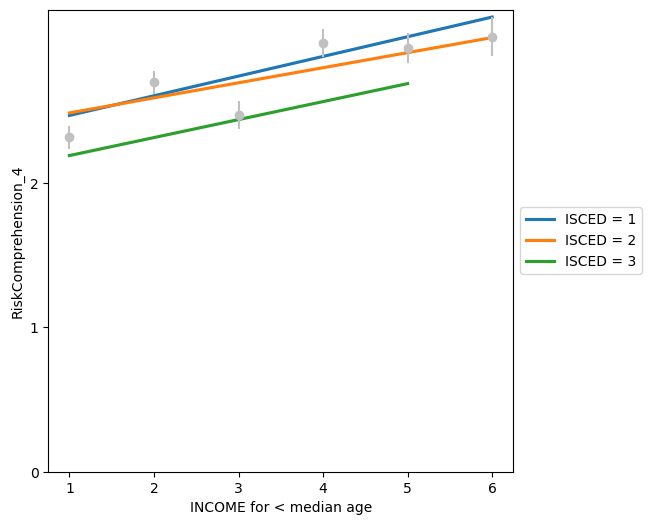

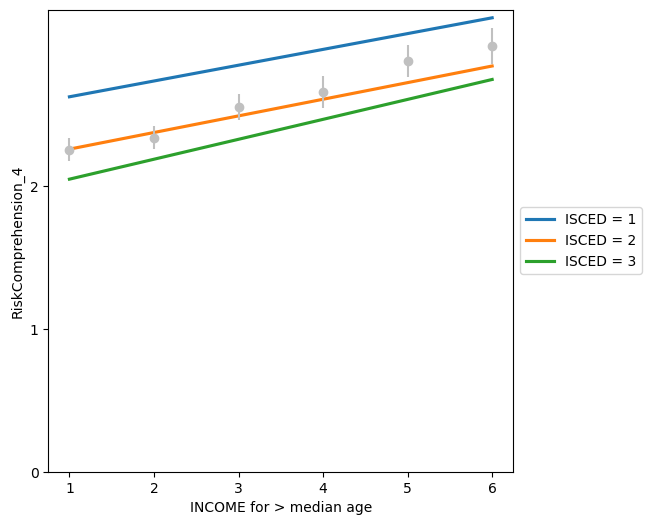

In [118]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income']).mean()['RiskComprehension_4'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income']).sem()['RiskComprehension_4'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='RiskComprehension_4', xlabel='INCOME for < median age',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['RiskComprehension_4'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income']).mean()['RiskComprehension_4'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income']).sem()['RiskComprehension_4'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='RiskComprehension_4', xlabel='INCOME for > median age',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

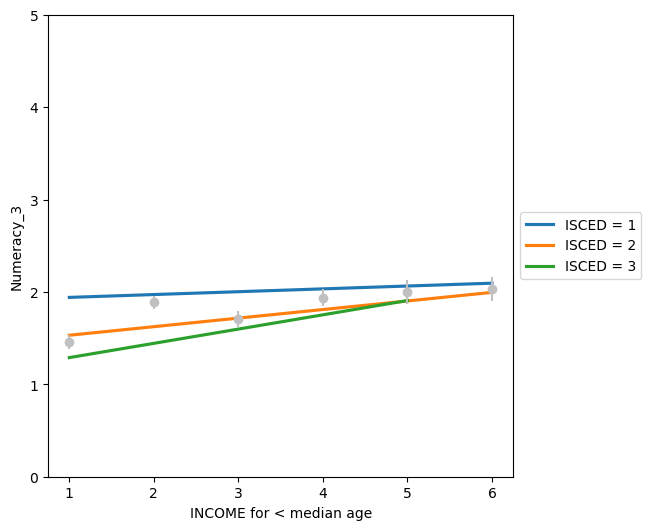

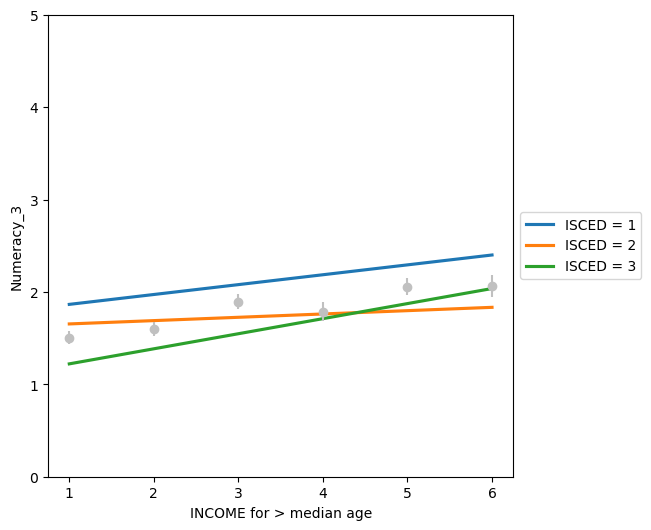

In [119]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income']).mean()['Numeracy_3'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income']).sem()['Numeracy_3'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Numeracy_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income']).mean()['Numeracy_3'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income']).sem()['Numeracy_3'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Numeracy_3', xlabel='INCOME for > median age',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

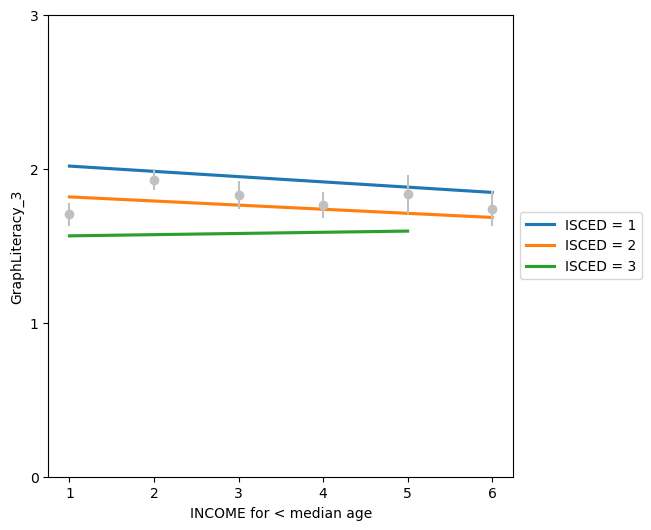

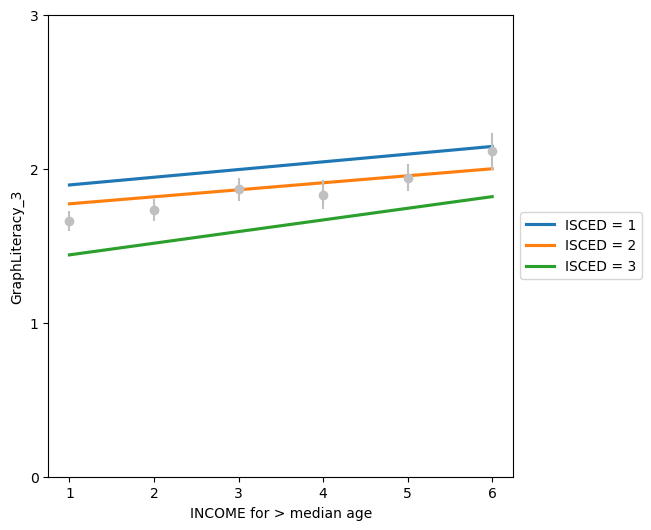

In [120]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income']).mean()['GraphLiteracy_3'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income']).sem()['GraphLiteracy_3'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income']).mean()['GraphLiteracy_3'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income']).sem()['GraphLiteracy_3'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME for > median age',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

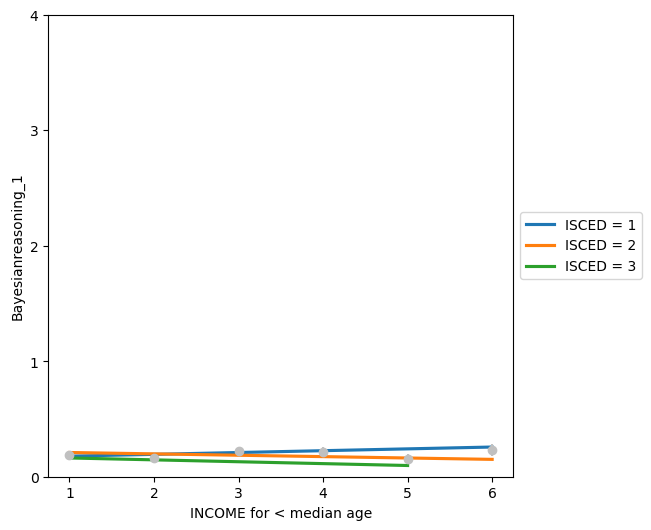

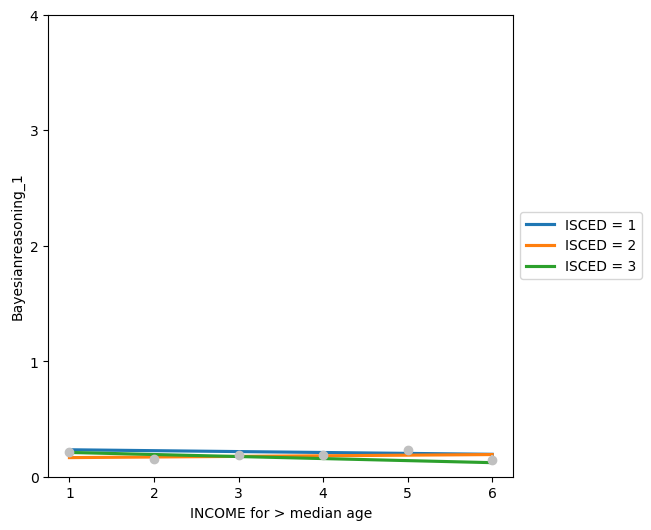

In [121]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income']).mean()['Bayesianreasoning_1'], yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income']).sem()['Bayesianreasoning_1'], fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for < median age',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] > age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = [1,2,3,4,5,6], y = df7.loc[ (df7['age'] > age_m)  ].groupby(['income']).mean()['Bayesianreasoning_1'], yerr = df7.loc[ (df7['age'] > age_m) ].groupby(['income']).sem()['Bayesianreasoning_1'], fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for > median age',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()